In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn

In [2]:
male_180_fast_walking = pd.read_csv('male_180_fast_walking.csv')
male_180_running = pd.read_csv('male_180_running.csv')
male_180_slow_walking = pd.read_csv('male_180_slow_walking.csv')
female_160_walking = pd.read_csv('female_160_walking.csv') 
male_180_rightfoot_walking = pd.read_csv('male_180_rightfoot_walking.csv')

Text(0, 0.5, 'Z Acceleration')

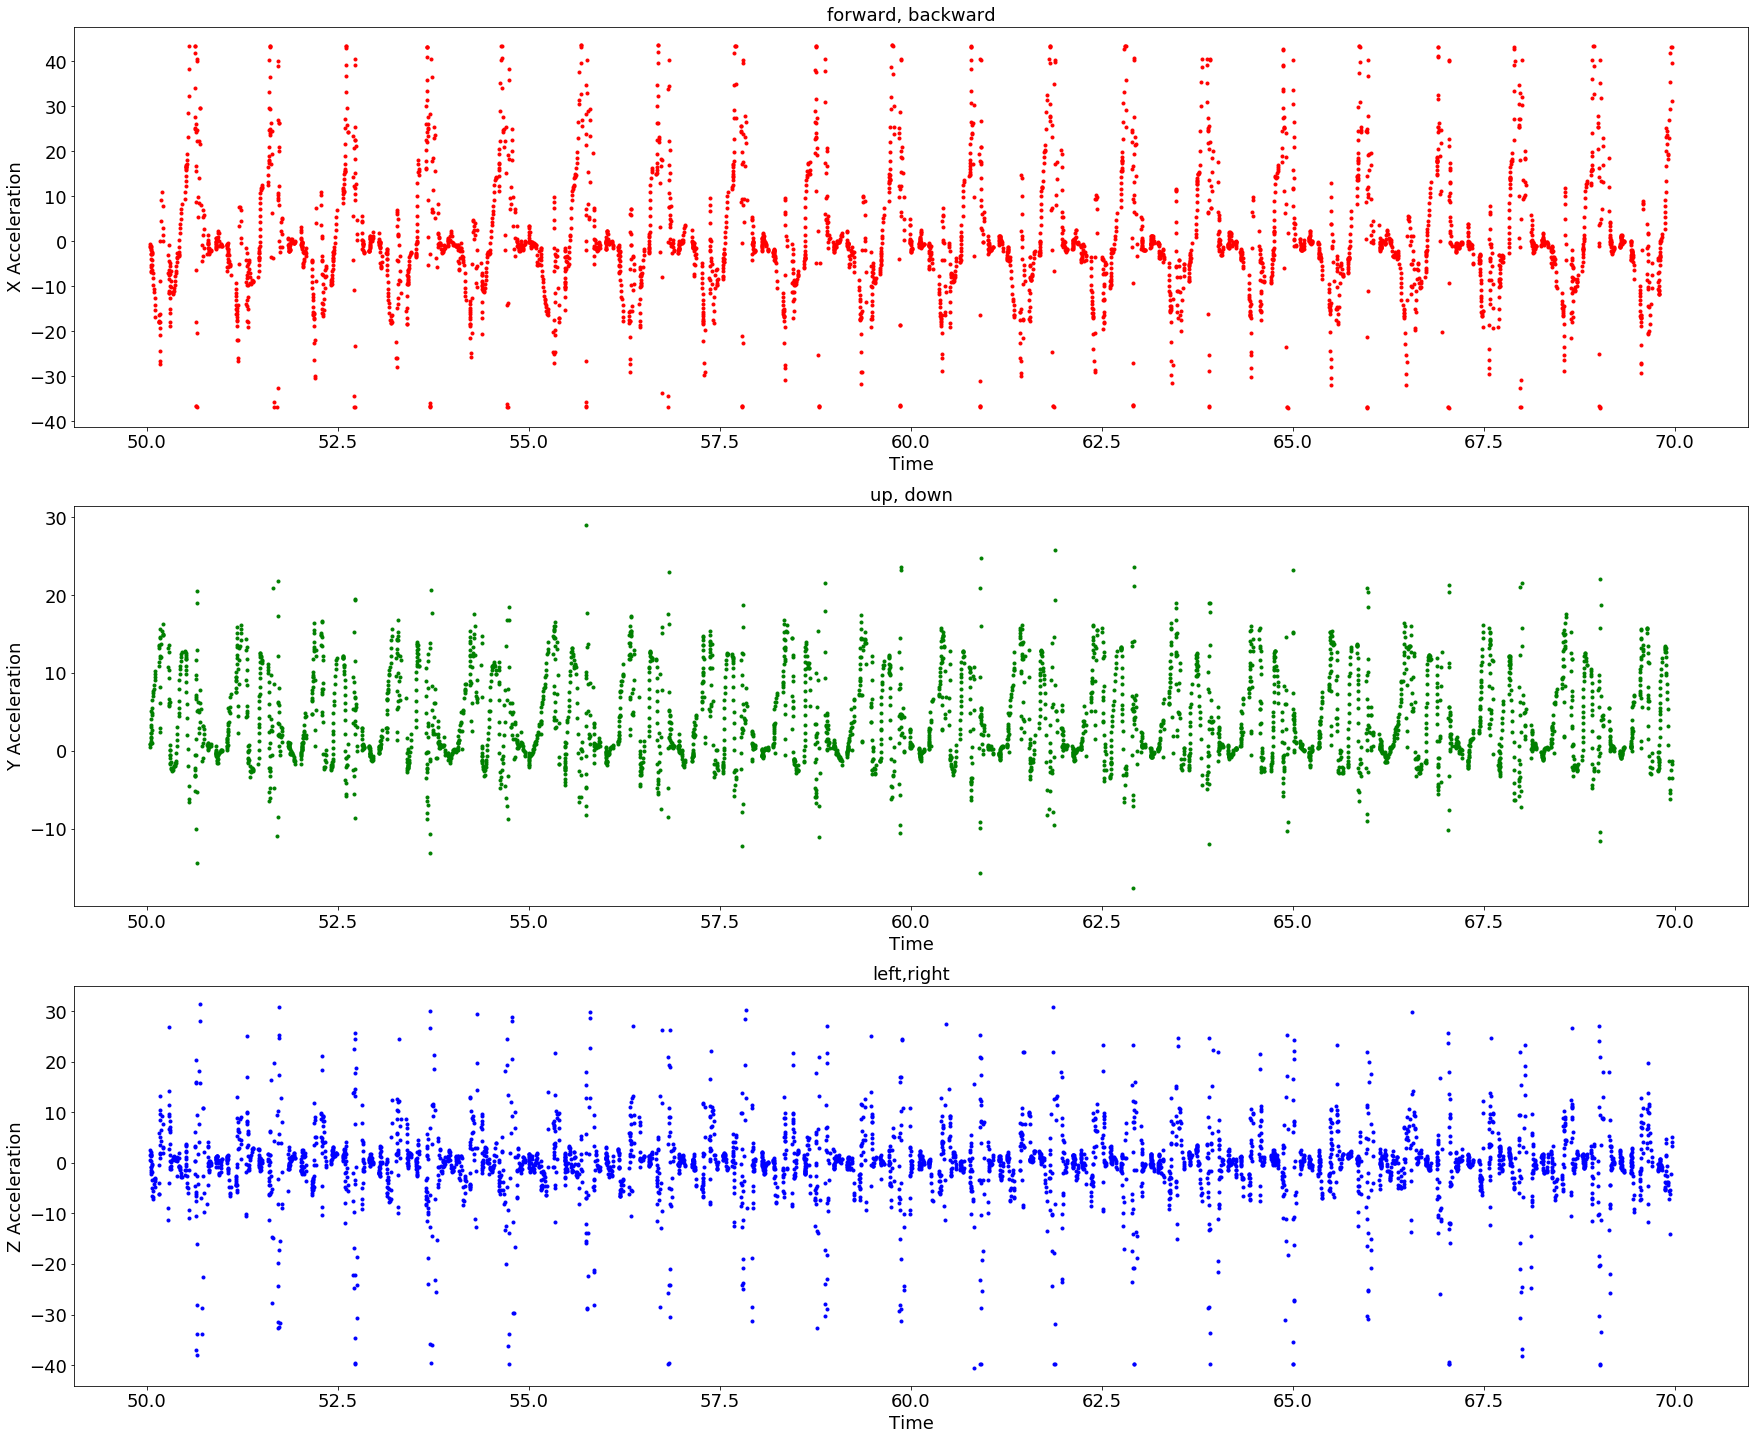

In [3]:
#data cleaning

male_180_fast_walking = male_180_fast_walking[male_180_fast_walking['time'] > 50]
male_180_fast_walking = male_180_fast_walking[male_180_fast_walking['time'] < 70]
male_180_running = male_180_running[male_180_running['time'] > 50]
male_180_running = male_180_running[male_180_running['time'] < 70]
male_180_slow_walking = male_180_slow_walking[male_180_slow_walking['time'] > 50]
male_180_slow_walking = male_180_slow_walking[male_180_slow_walking['time'] < 70]
female_160_walking = female_160_walking[female_160_walking['time'] > 50]
female_160_walking = female_160_walking[female_160_walking['time'] < 70]

male_180_rightfoot_walking = male_180_rightfoot_walking[male_180_rightfoot_walking['time'] > 50]
male_180_rightfoot_walking = male_180_rightfoot_walking[male_180_rightfoot_walking['time'] < 70]
#male_180_rightfoot_walking
plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
plt.xlabel('Time')
plt.ylabel('X Acceleration')
plt.subplot(3, 1, 2)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ay'], 'g.')	#up, down [-1, 1.5]
plt.title('up, down')
plt.xlabel('Time')
plt.ylabel('Y Acceleration')
plt.subplot(3, 1, 3)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['az'], 'b.')	#left, right [-1, 1]
plt.title('left,right')
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

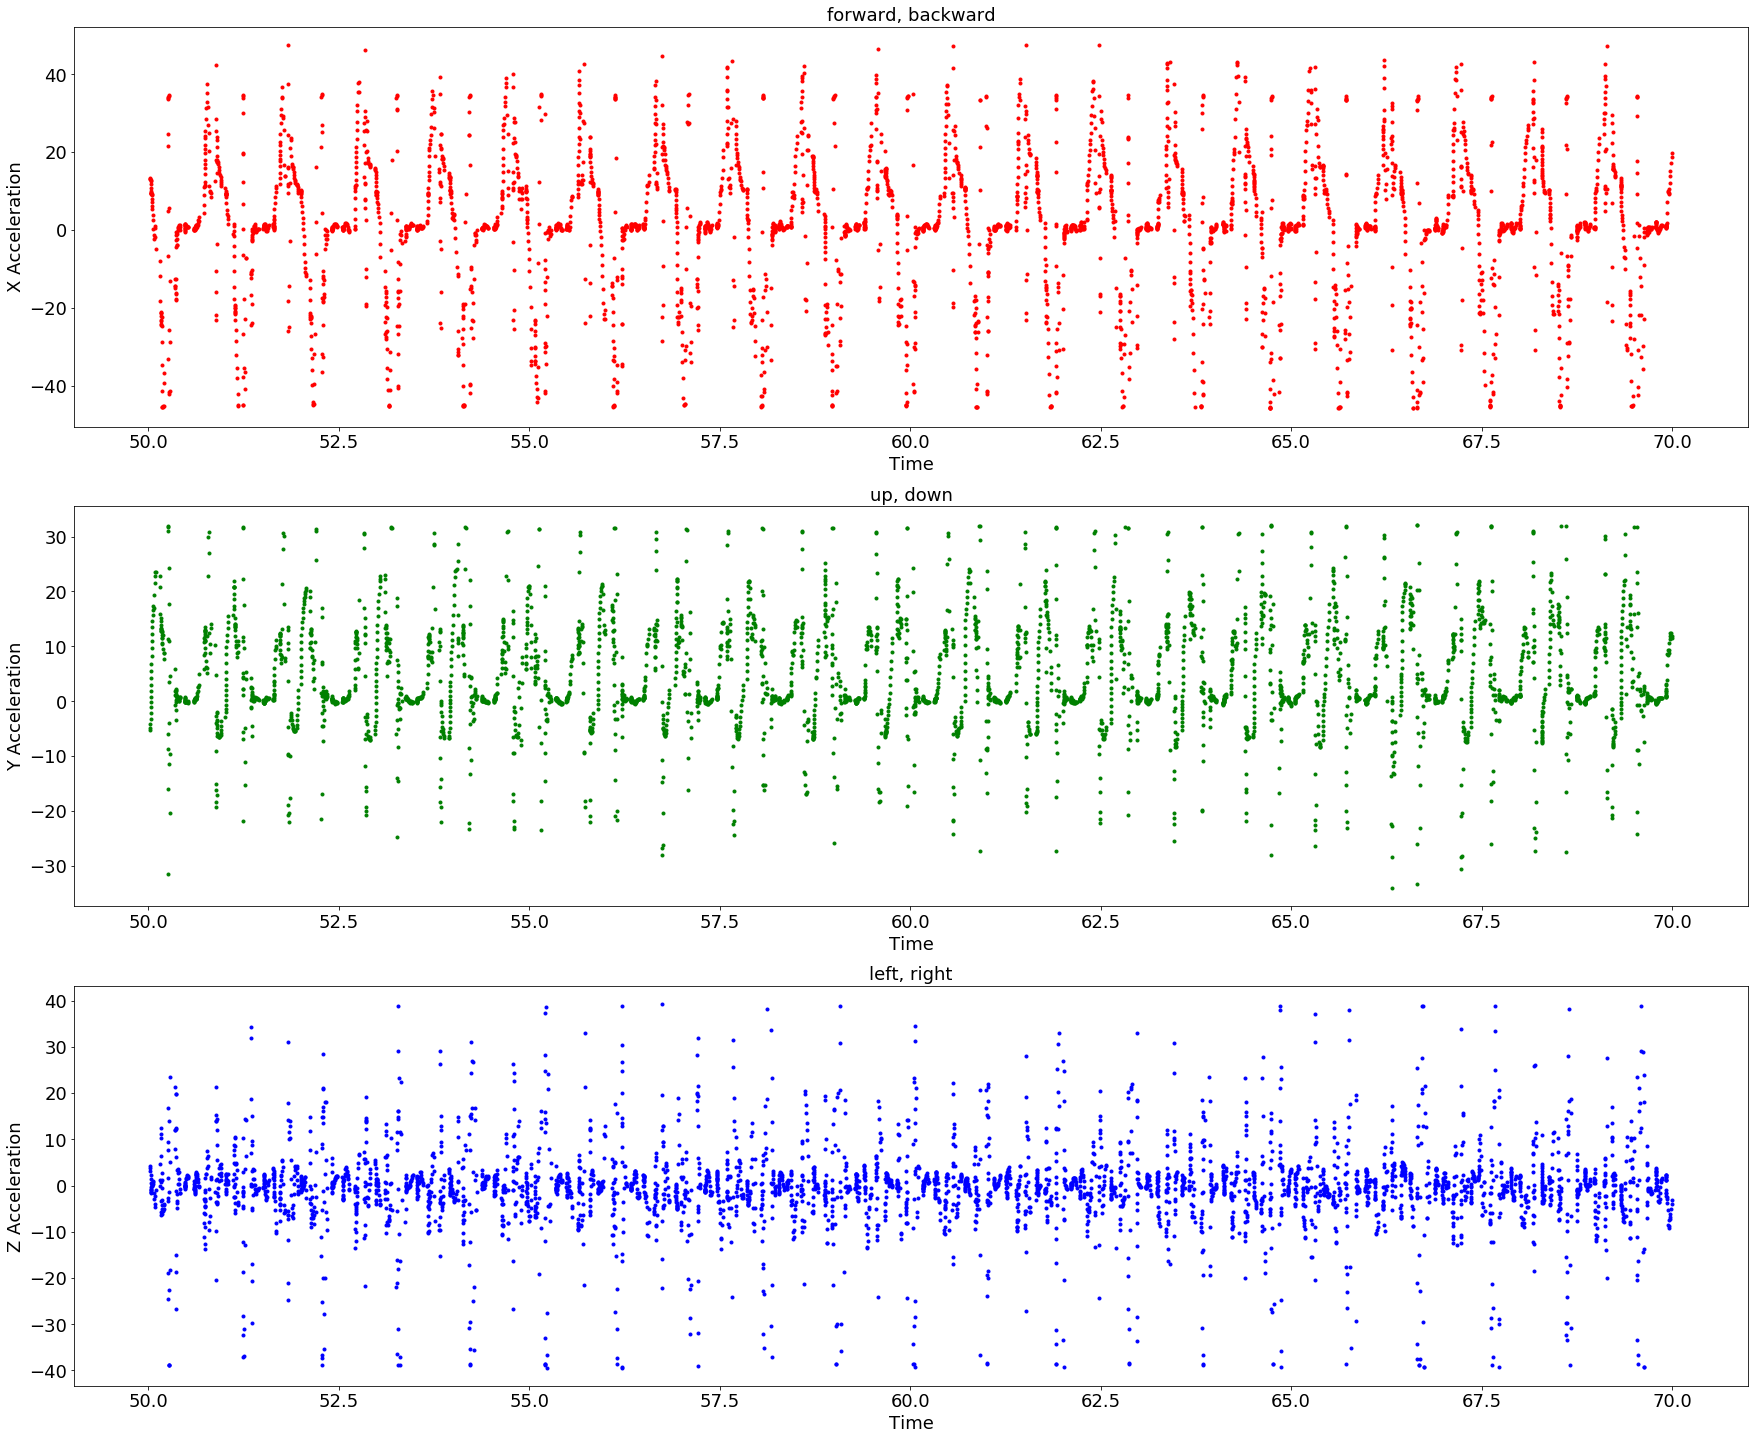

In [4]:
#male_180_fast_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
plt.xlabel('Time')
plt.ylabel('X Acceleration')
plt.subplot(3, 1, 2)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ay'], 'g.')	#up, down [-1, 1.5]
plt.title('up, down')
plt.xlabel('Time')
plt.ylabel('Y Acceleration')
plt.subplot(3, 1, 3)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['az'], 'b.')	#left, right [-1, 1]
plt.title('left, right')
plt.xlabel('Time')
plt.ylabel('Z Acceleration')
# plt.plot(df['time'].values, df['TgF'], 'y.')

Text(0, 0.5, 'Z Acceleration')

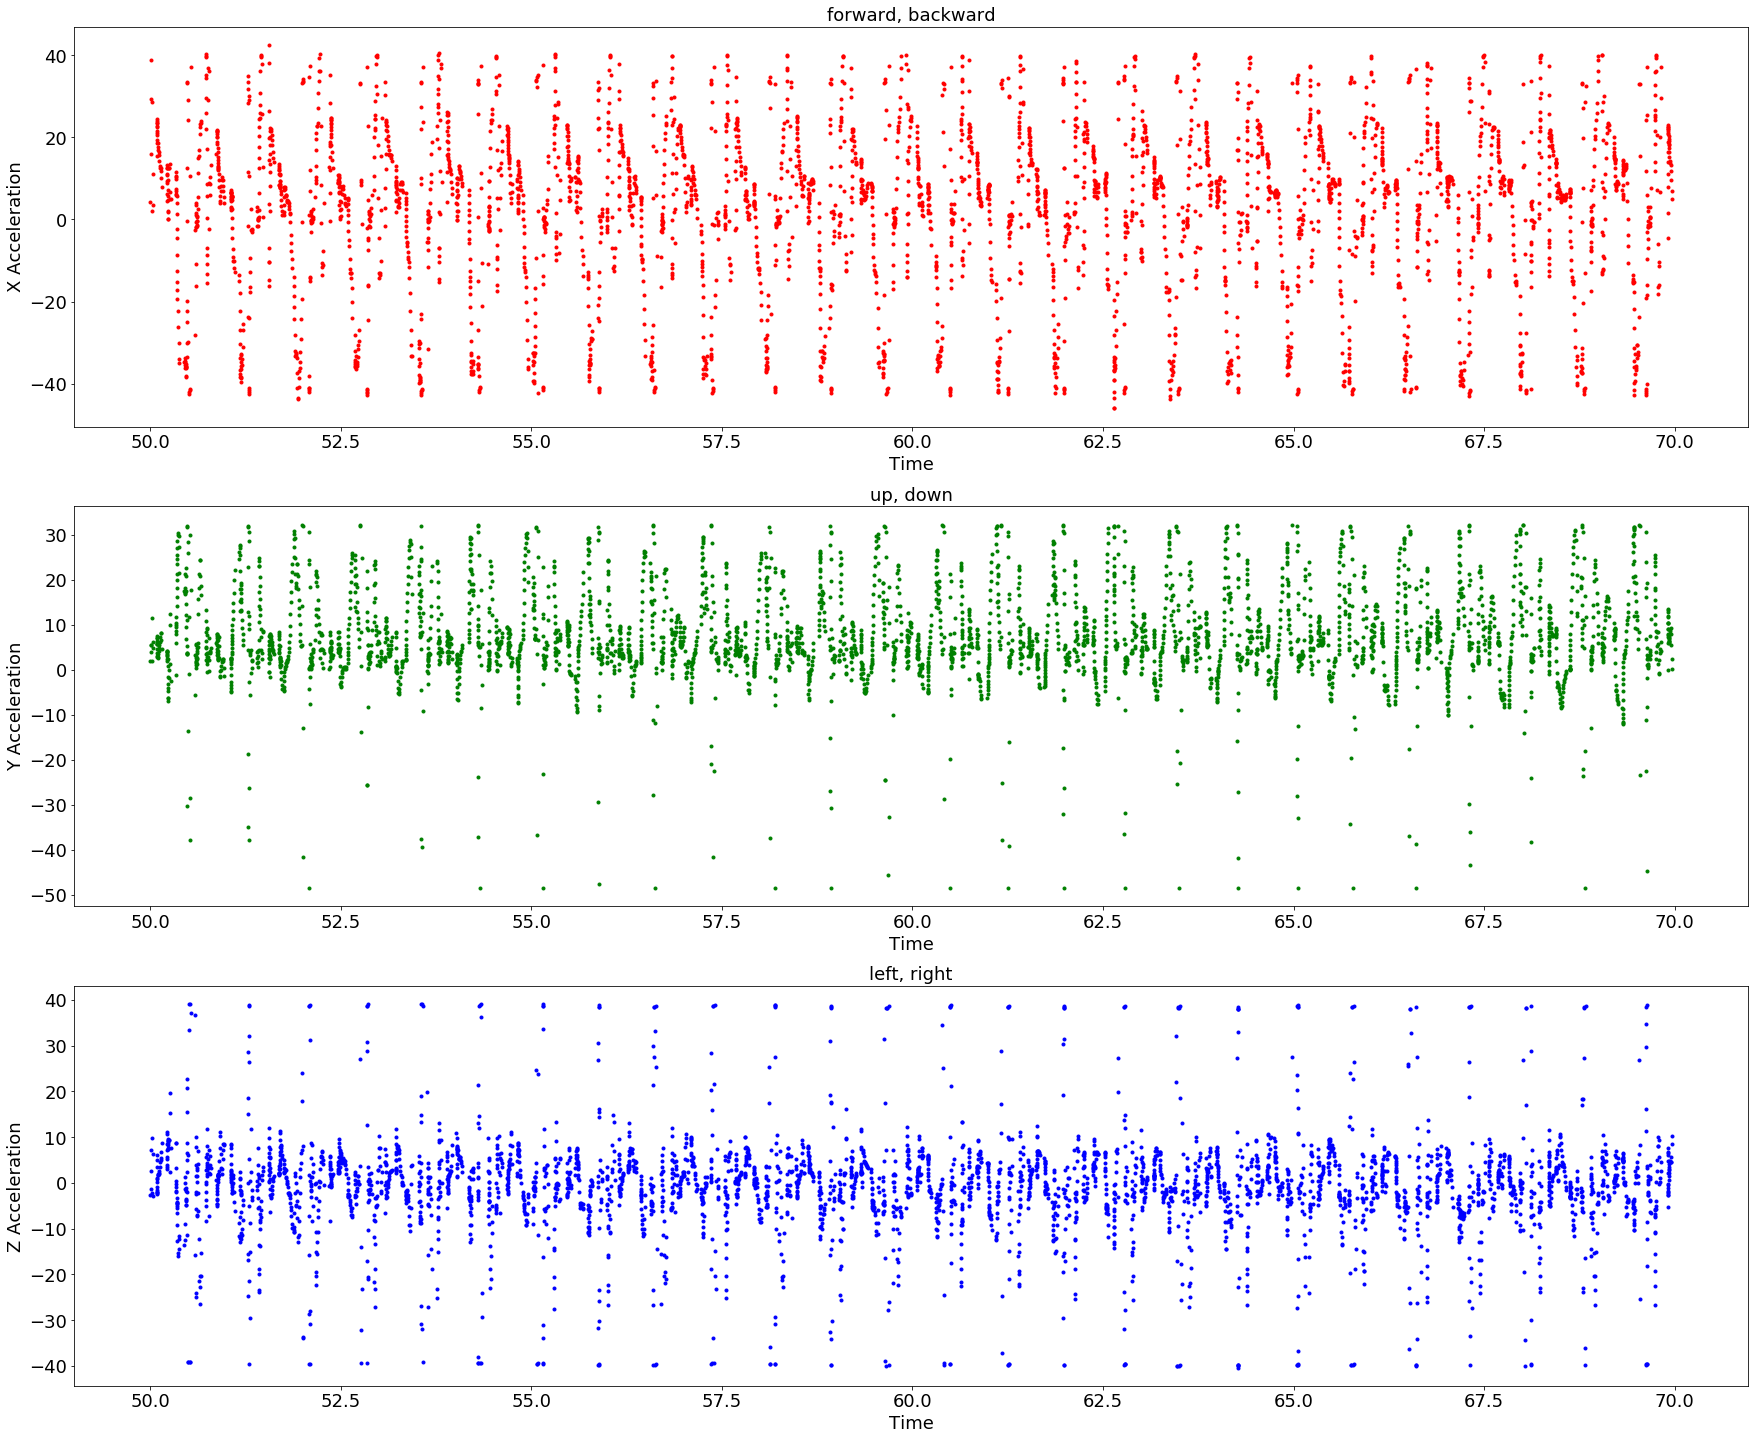

In [5]:
#male_180_running

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_running['time'].values, male_180_running['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
plt.xlabel('Time')
plt.ylabel('X Acceleration')
plt.subplot(3, 1, 2)
plt.plot(male_180_running['time'].values, male_180_running['ay'], 'g.')	#up, down [-1, 1.5]
plt.title('up, down')
plt.xlabel('Time')
plt.ylabel('Y Acceleration')
plt.subplot(3, 1, 3)
plt.plot(male_180_running['time'].values, male_180_running['az'], 'b.')	#left, right [-1, 1]
plt.title('left, right')
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

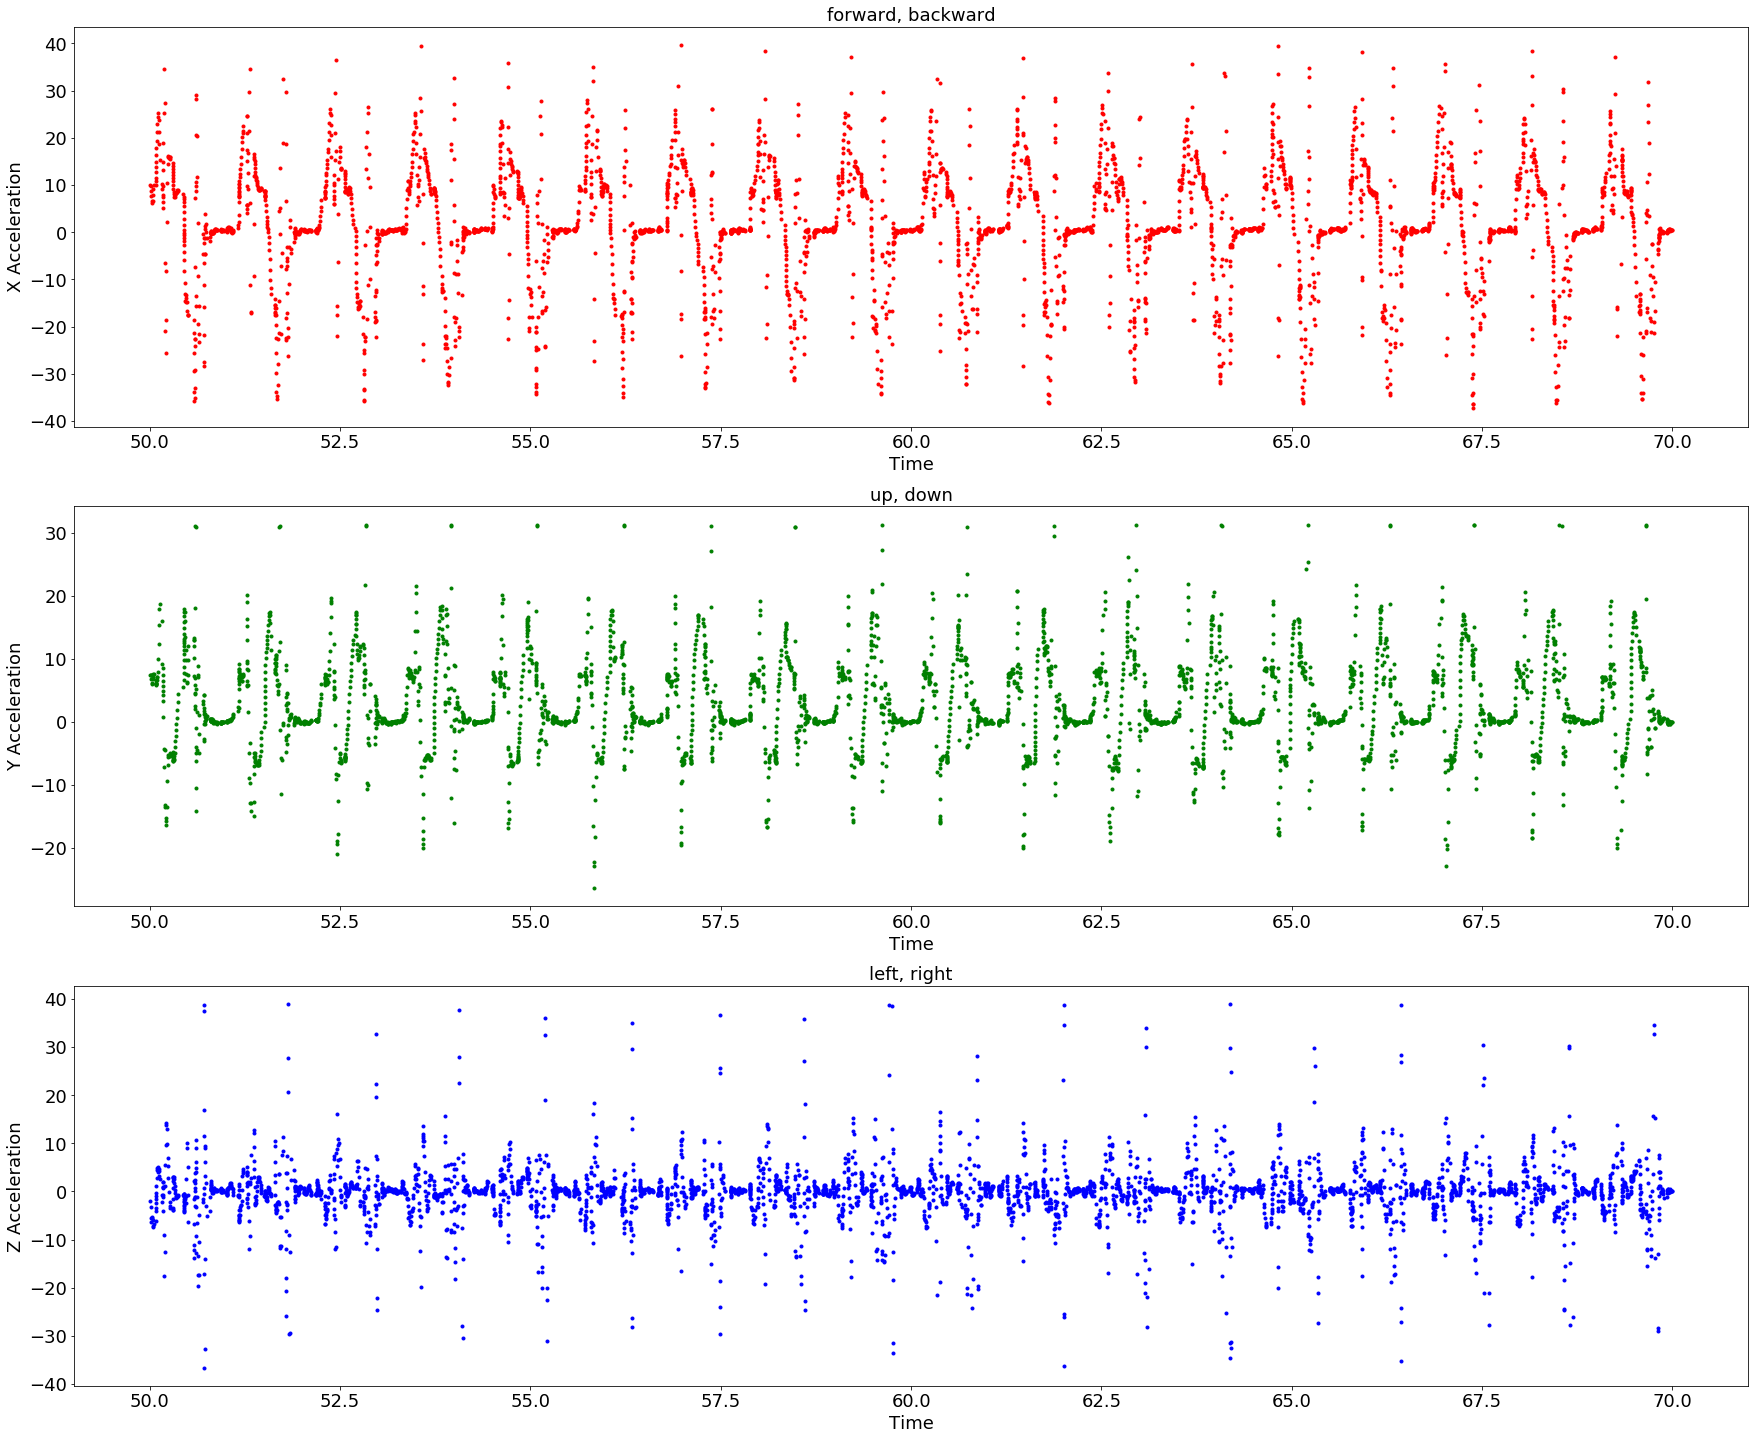

In [6]:
#male_180_slow_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
plt.xlabel('Time')
plt.ylabel('X Acceleration')
plt.subplot(3, 1, 2)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ay'], 'g.')	#up, down [-1, 1.5]
plt.title('up, down')
plt.xlabel('Time')
plt.ylabel('Y Acceleration')
plt.subplot(3, 1, 3)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['az'], 'b.')	#left, right [-1, 1]
plt.title('left, right')
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

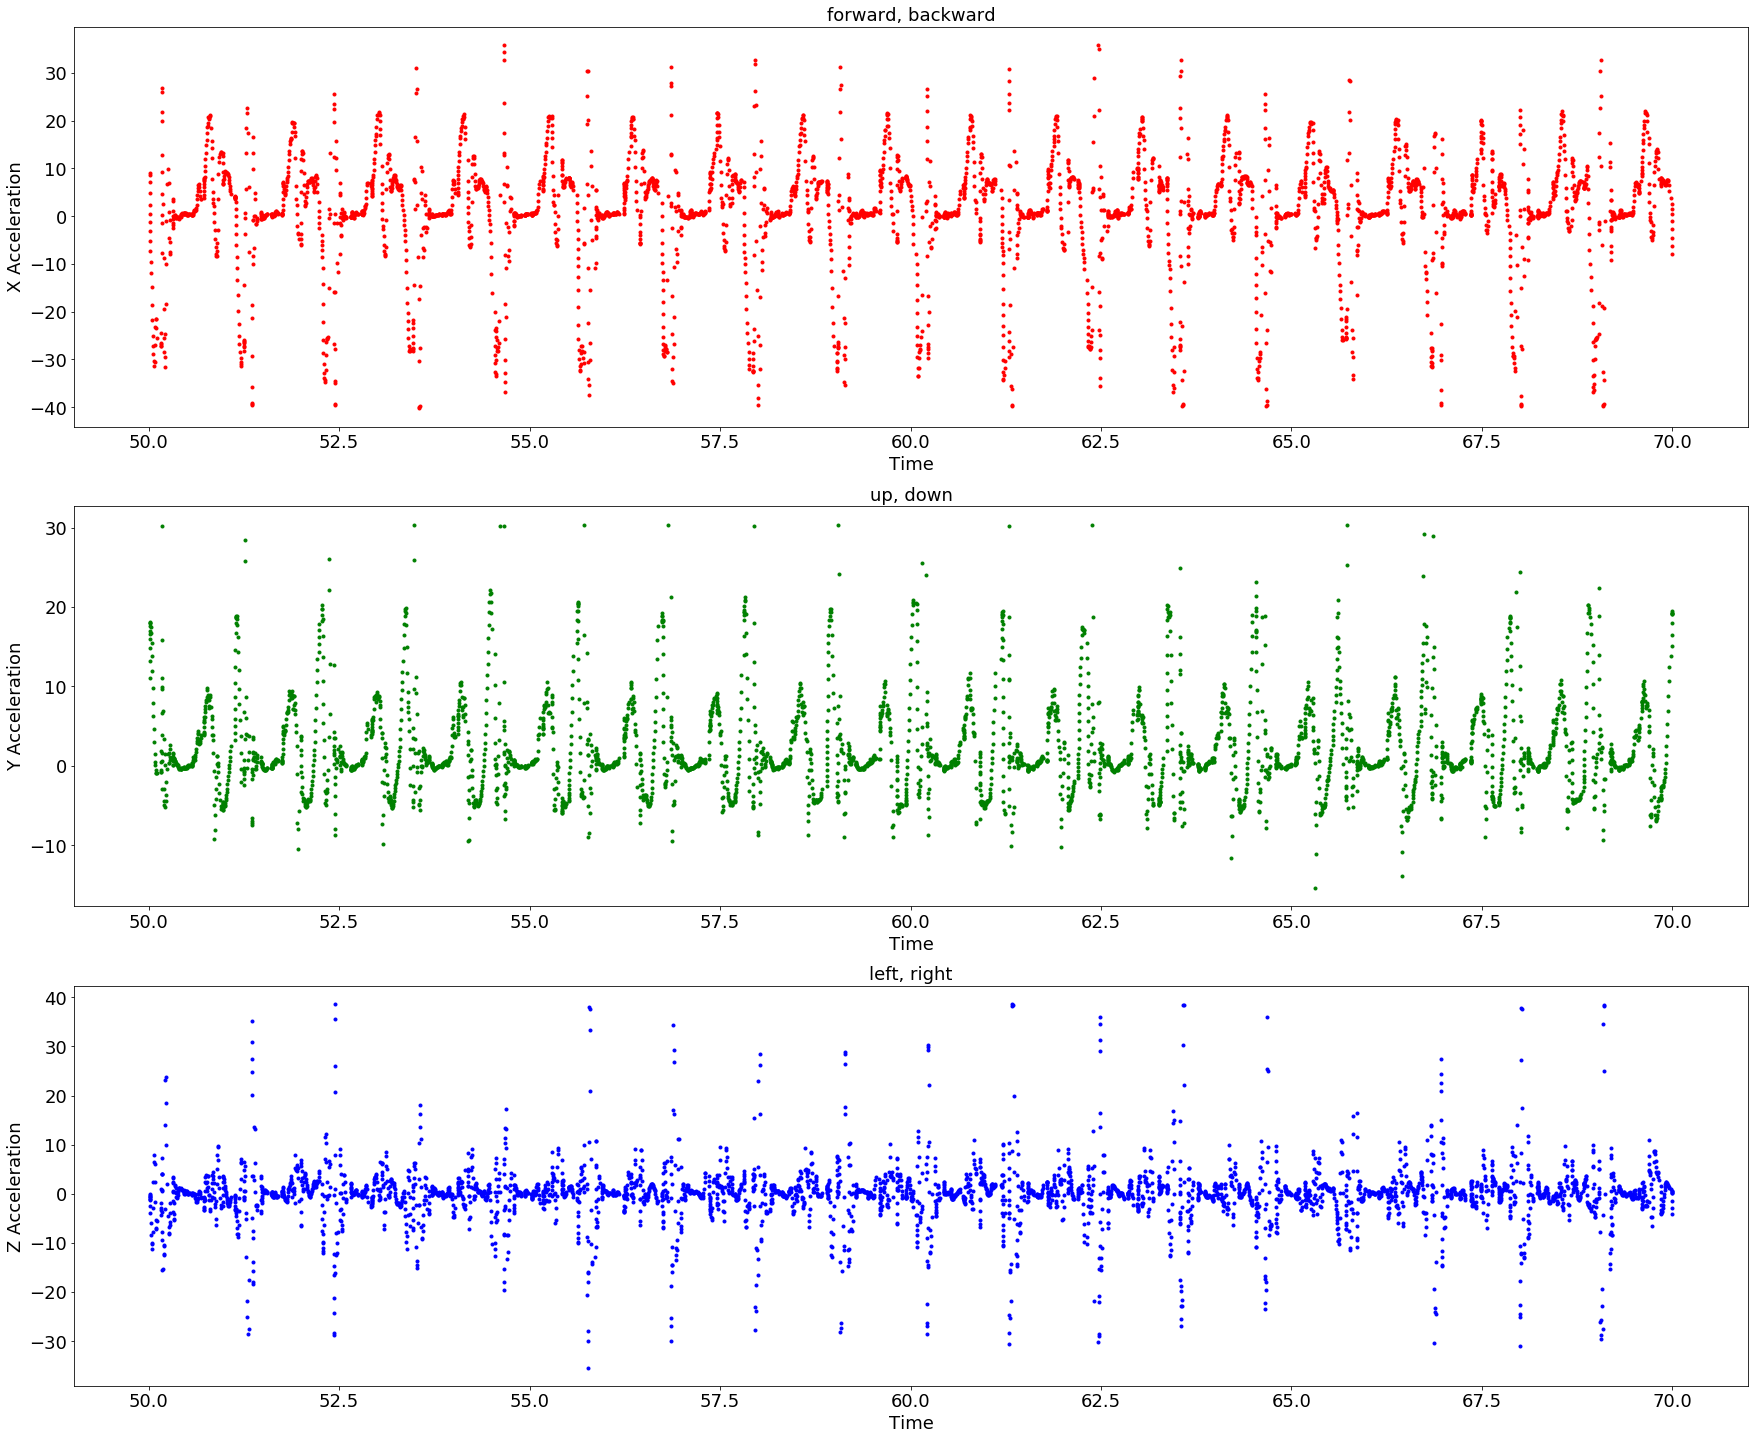

In [7]:
#female_160_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(female_160_walking['time'].values, female_160_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
plt.xlabel('Time')
plt.ylabel('X Acceleration')
plt.subplot(3, 1, 2)
plt.plot(female_160_walking['time'].values, female_160_walking['ay'], 'g.')	#up, down [-1, 1.5]
plt.title('up, down')
plt.xlabel('Time')
plt.ylabel('Y Acceleration')
plt.subplot(3, 1, 3)
plt.plot(female_160_walking['time'].values, female_160_walking['az'], 'b.')	#left, right [-1, 1]
plt.title('left, right')
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

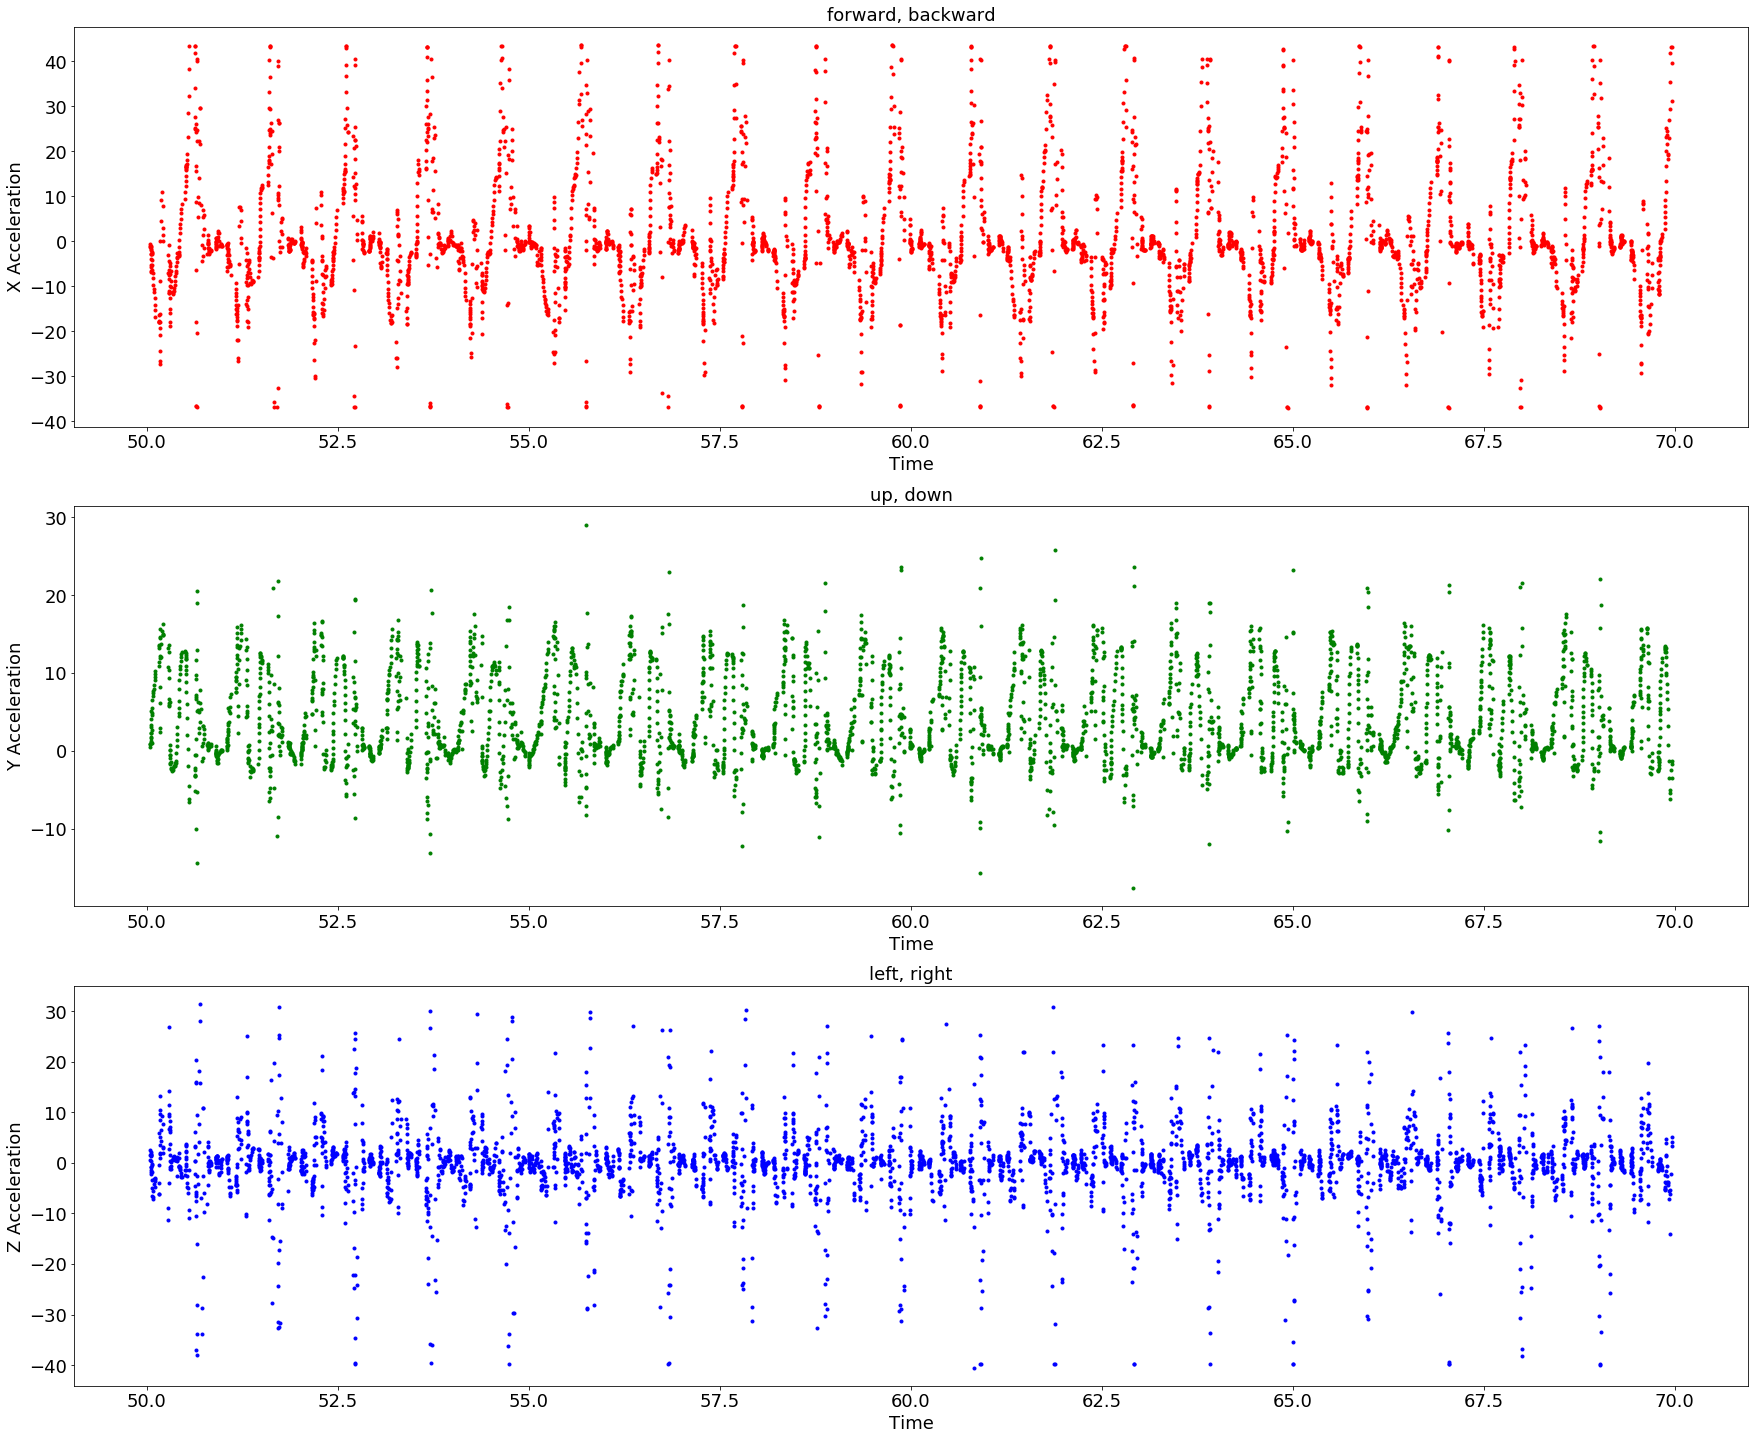

In [8]:
#male_180_rightfoot_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
plt.xlabel('Time')
plt.ylabel('X Acceleration')
plt.subplot(3, 1, 2)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ay'], 'g.')	#up, down [-1, 1.5]
plt.title('up, down')
plt.xlabel('Time')
plt.ylabel('Y Acceleration')
plt.subplot(3, 1, 3)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['az'], 'b.')	#left, right [-1, 1]
plt.title('left, right')
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

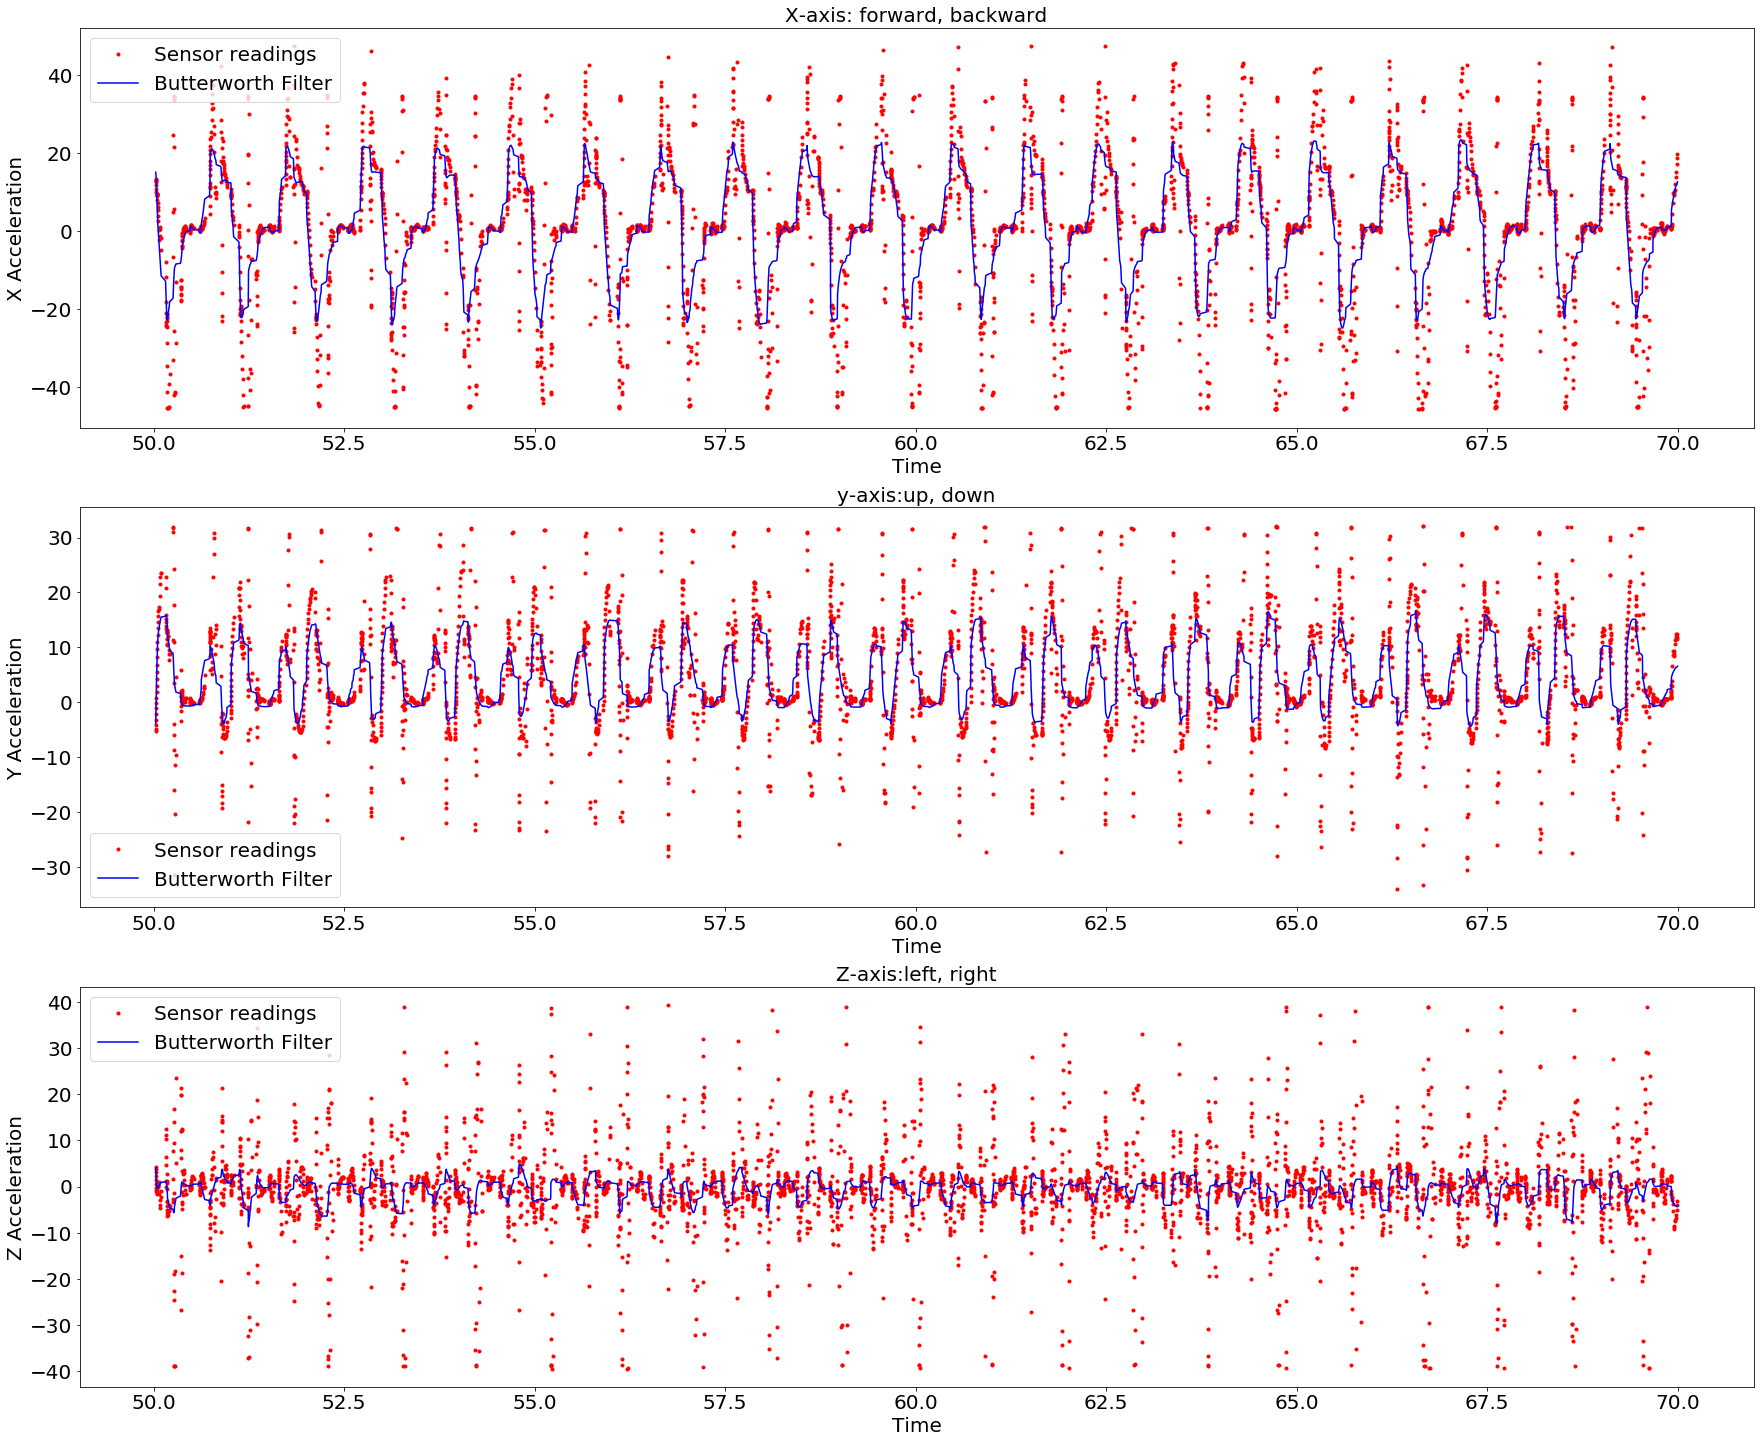

In [40]:
#Butterworth filter
#male_180_fast_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=20)          # Set default font size
plt.rc('axes', titlesize=20)     # Set axes title
plt.rc('axes', labelsize=20)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=20)    # Set legend fontsize
plt.rc('figure', titlesize=20)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ax'], 'r.')	#forward, backward []
plt.title('X-axis: forward, backward')
b_male_180_fast_walking, a_male_180_fast_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_fast_walking_x = signal.filtfilt(b_male_180_fast_walking, a_male_180_fast_walking, male_180_fast_walking['ax'])
t_male_180_fast_walking = male_180_fast_walking['time']
plt.plot(t_male_180_fast_walking.values,low_passed_male_180_fast_walking_x, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ay'], 'r.')	#up, down []
plt.title('y-axis:up, down')
b_male_180_fast_walking, a_male_180_fast_walking = signal.butter(3, 0.03, btype='lowpass', analog=False)
low_passed_male_180_fast_walking_y = signal.filtfilt(b_male_180_fast_walking, a_male_180_fast_walking, male_180_fast_walking['ay'])
t_male_180_fast_walking = male_180_fast_walking['time']
plt.plot(t_male_180_fast_walking.values,low_passed_male_180_fast_walking_y, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['az'], 'r.')	#left, right []
plt.title('Z-axis:left, right')
b_male_180_fast_walking, a_male_180_fast_walking = signal.butter(3, 0.05, btype='lowpass', analog=False)
low_passed_male_180_fast_walking_z = signal.filtfilt(b_male_180_fast_walking, a_male_180_fast_walking, male_180_fast_walking['az'])
t_male_180_fast_walking = male_180_fast_walking['time']
plt.plot(t_male_180_fast_walking.values,low_passed_male_180_fast_walking_z, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

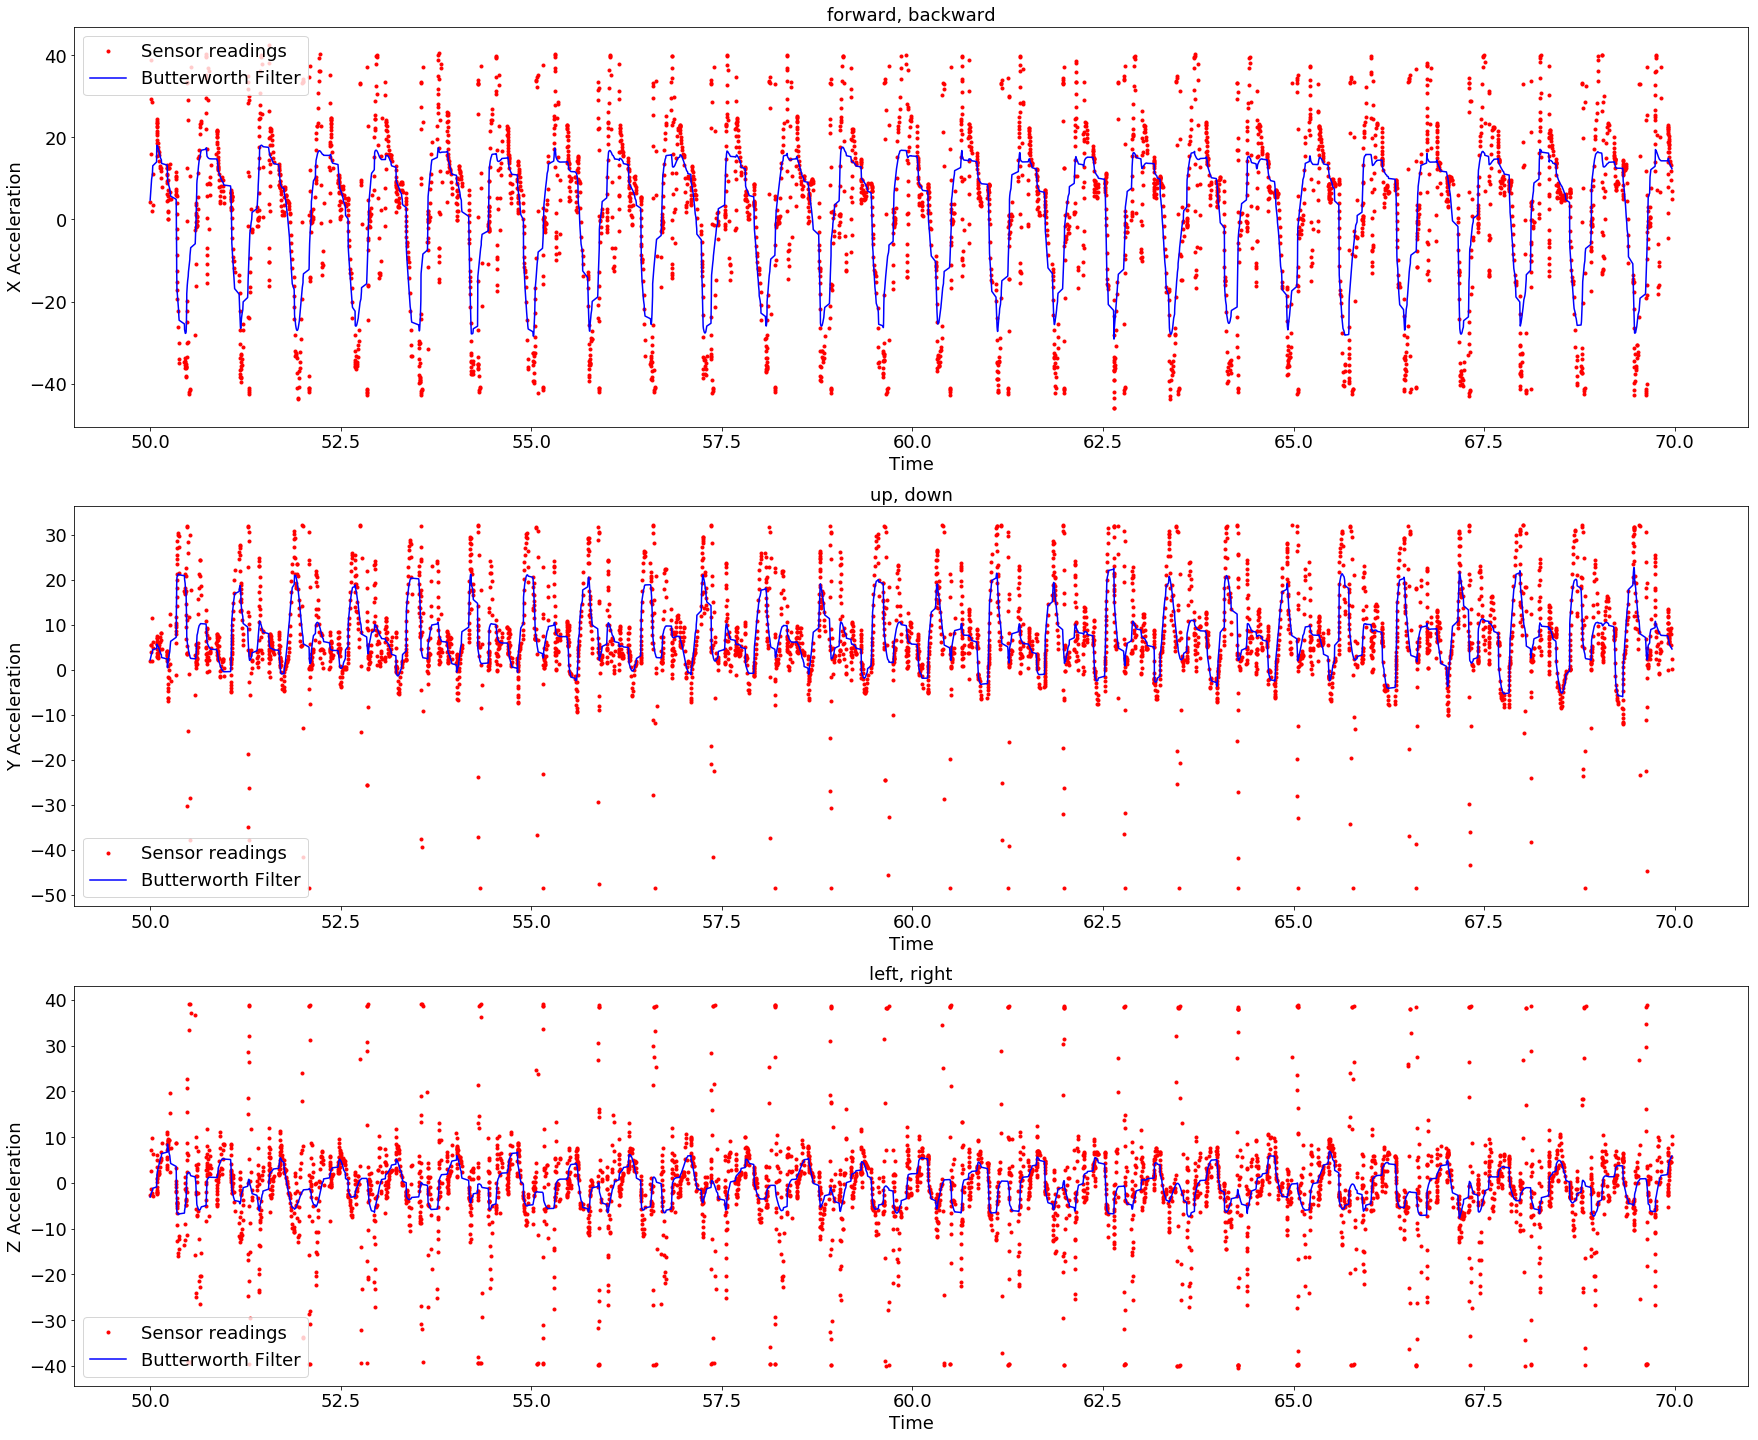

In [10]:
#Butterworth filter
#male_180_running

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_running['time'].values, male_180_running['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
b_male_180_running, a_male_180_running = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_running_x = signal.filtfilt(b_male_180_running, a_male_180_running, male_180_running['ax'])
t_male_180_running = male_180_running['time']
plt.plot(t_male_180_running.values,low_passed_male_180_running_x, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_running['time'].values, male_180_running['ay'], 'r.')	#up, down []
plt.title('up, down')
b_male_180_running, a_male_180_running = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_running_y = signal.filtfilt(b_male_180_running, a_male_180_running, male_180_running['ay'])
t_male_180_running = male_180_running['time']
plt.plot(t_male_180_running.values,low_passed_male_180_running_y, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_running['time'].values, male_180_running['az'], 'r.')	#left, right []
plt.title('left, right')
b_male_180_running, a_male_180_running = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_running_z = signal.filtfilt(b_male_180_running, a_male_180_running, male_180_running['az'])
t_male_180_running = male_180_running['time']
plt.plot(t_male_180_running.values,low_passed_male_180_running_z, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')


Text(0, 0.5, 'Z Acceleration')

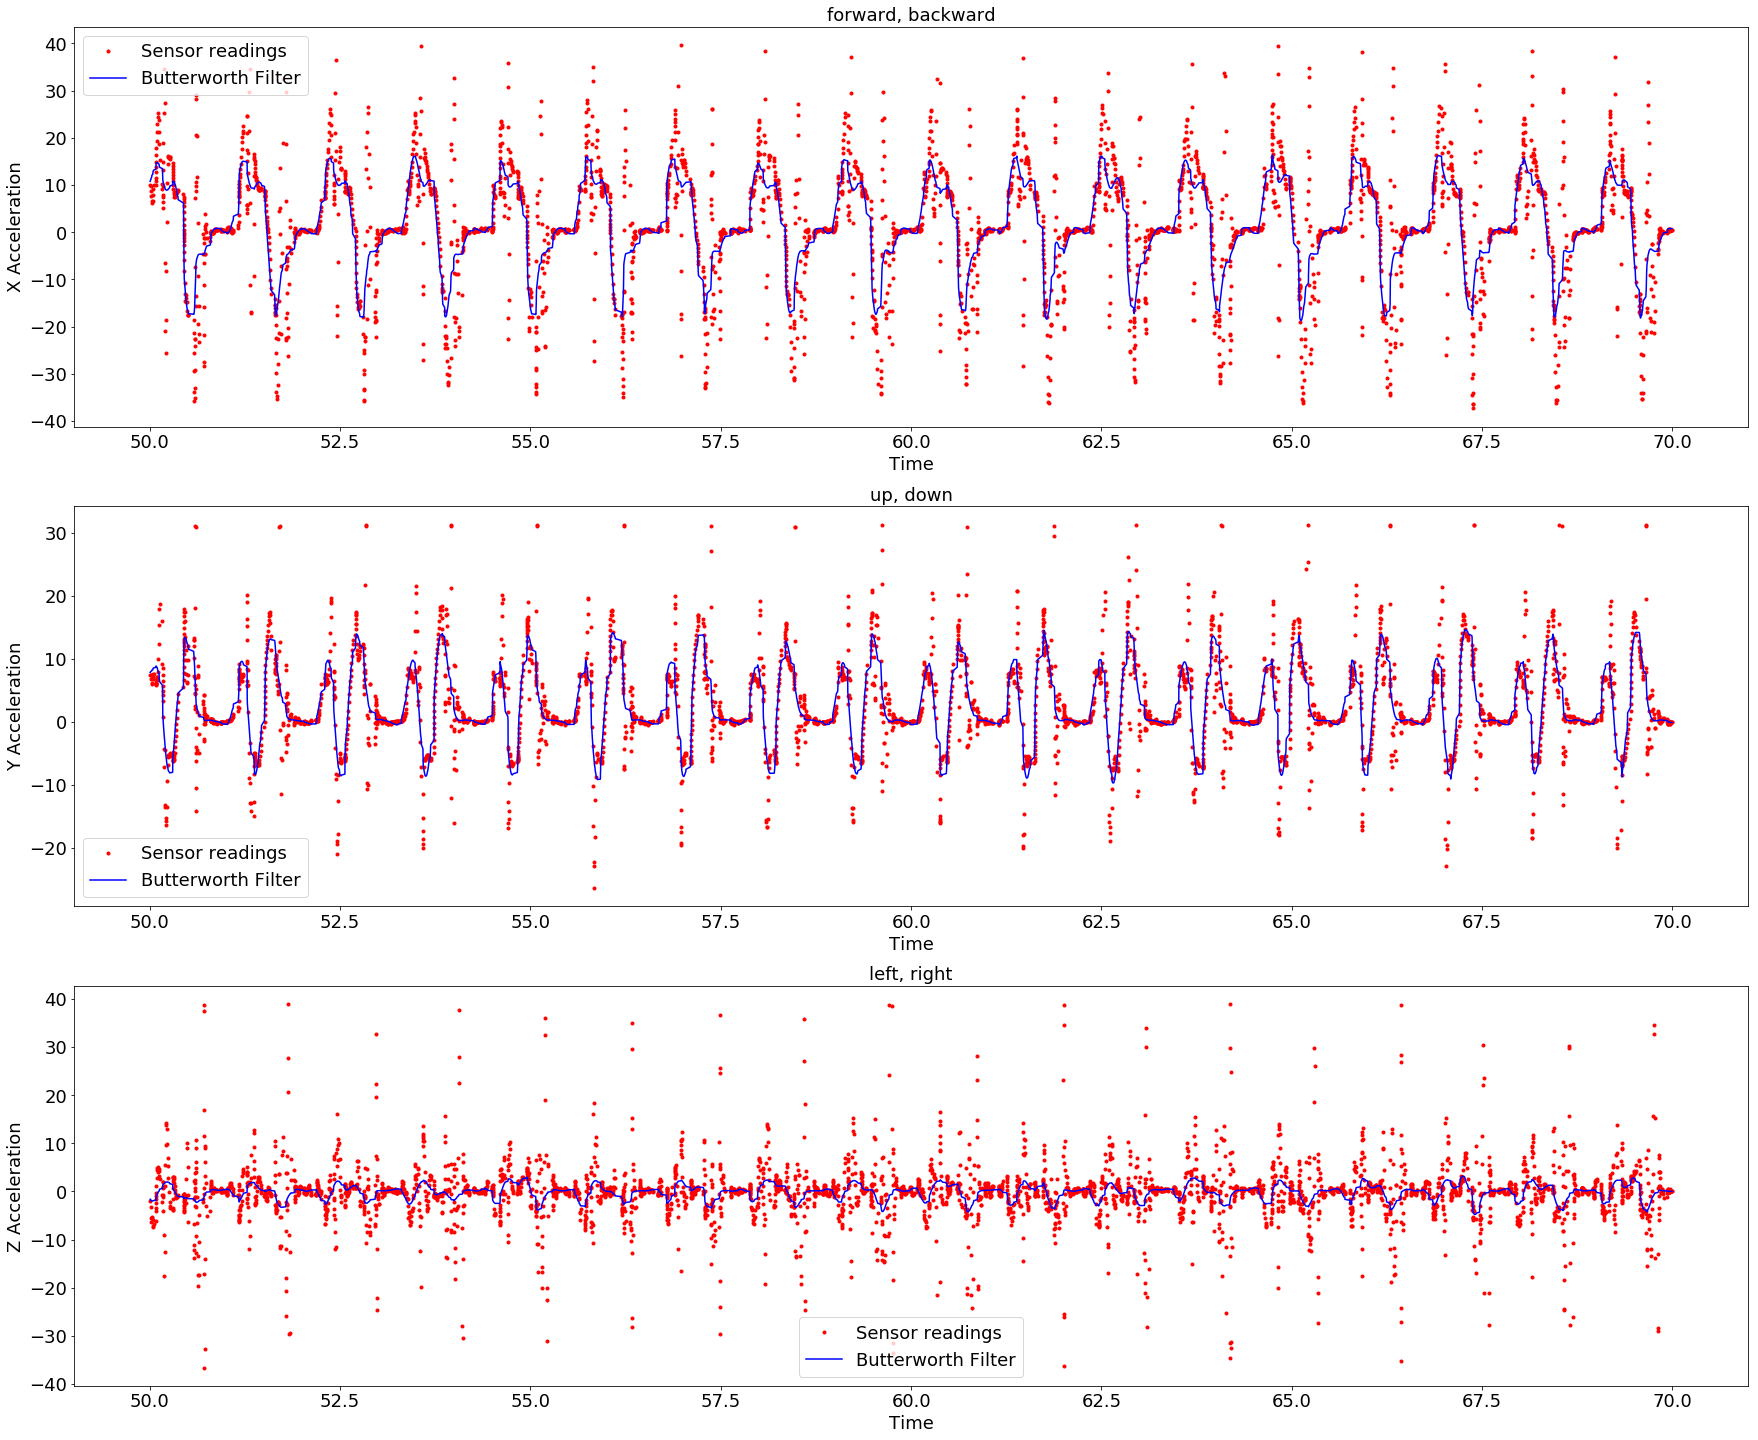

In [11]:
#Butterworth filter
#male_180_slow_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
b_male_180_slow_walking, a_male_180_slow_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_slow_walking_x = signal.filtfilt(b_male_180_slow_walking, a_male_180_slow_walking, male_180_slow_walking['ax'])
t_male_180_slow_walking = male_180_slow_walking['time']
plt.plot(t_male_180_slow_walking.values,low_passed_male_180_slow_walking_x, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ay'], 'r.')	#up, down []
plt.title('up, down')
b_male_180_slow_walking, a_male_180_slow_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_slow_walking_y = signal.filtfilt(b_male_180_slow_walking, a_male_180_slow_walking, male_180_slow_walking['ay'])
t_male_180_slow_walking = male_180_slow_walking['time']
plt.plot(t_male_180_slow_walking.values,low_passed_male_180_slow_walking_y, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['az'], 'r.')	#left, right []
plt.title('left, right')
b_male_180_slow_walking, a_male_180_slow_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_slow_walking_z = signal.filtfilt(b_male_180_slow_walking, a_male_180_slow_walking, male_180_slow_walking['az'])
t_male_180_slow_walking = male_180_slow_walking['time']
plt.plot(t_male_180_slow_walking.values,low_passed_male_180_slow_walking_z, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

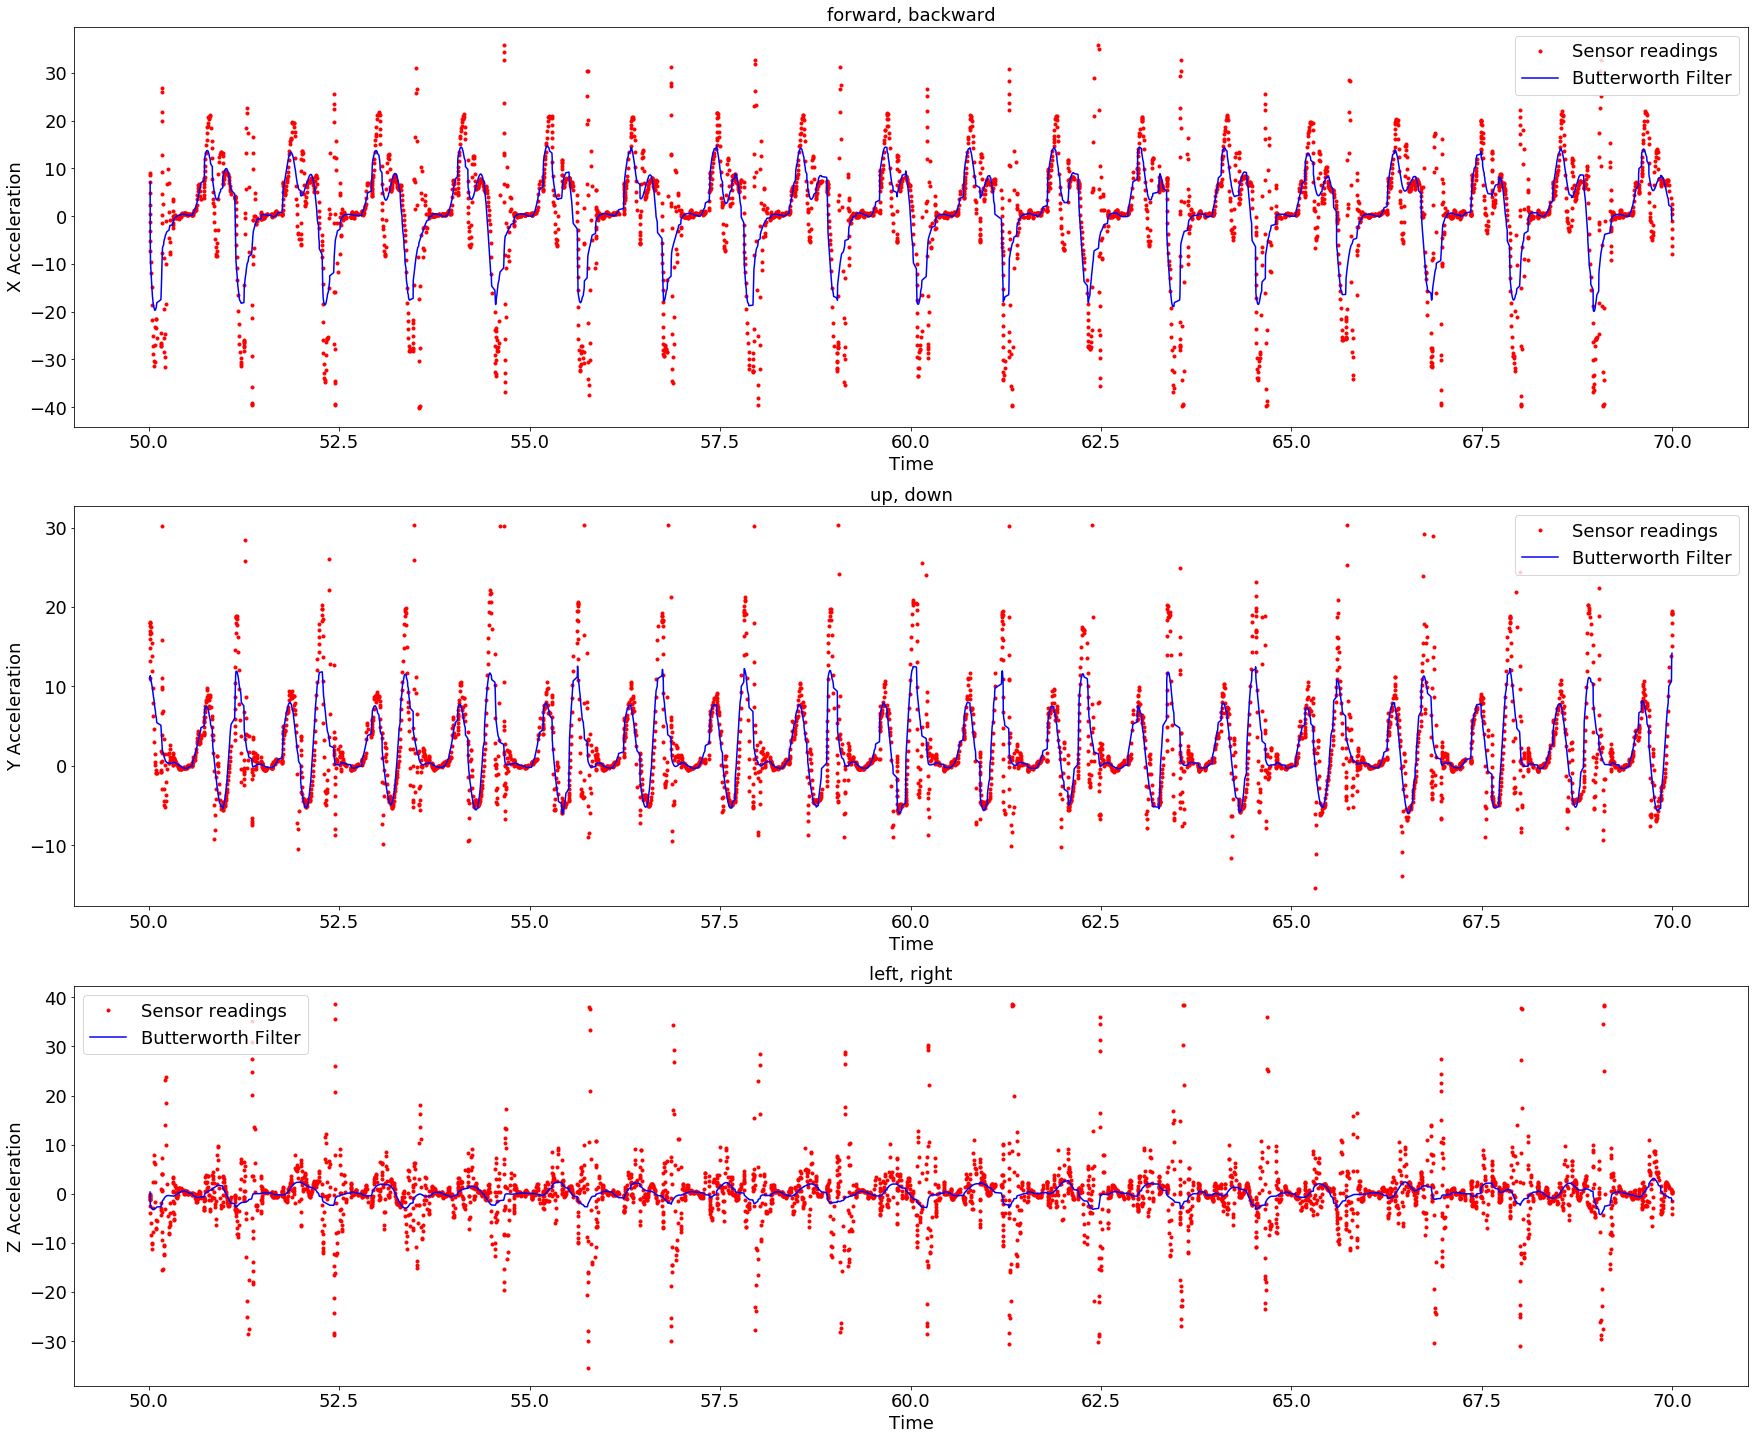

In [12]:
#Butterworth filter
#female_160_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(female_160_walking['time'].values, female_160_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
b_female_160_walking, a_female_160_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_female_160_walking_x = signal.filtfilt(b_female_160_walking, a_female_160_walking, female_160_walking['ax'])
t_female_160_walking = female_160_walking['time']
plt.plot(t_female_160_walking.values,low_passed_female_160_walking_x, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(female_160_walking['time'].values, female_160_walking['ay'], 'r.')	#up, down []
plt.title('up, down')
b_female_160_walking, a_female_160_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_female_160_walking_y = signal.filtfilt(b_female_160_walking, a_female_160_walking, female_160_walking['ay'])
t_female_160_walking = female_160_walking['time']
plt.plot(t_female_160_walking.values,low_passed_female_160_walking_y, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(female_160_walking['time'].values, female_160_walking['az'], 'r.')	#left, right []
plt.title('left, right')
b_female_160_walking, a_female_160_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_female_160_walking_z = signal.filtfilt(b_female_160_walking, a_female_160_walking, female_160_walking['az'])
t_female_160_walking = female_160_walking['time']
plt.plot(t_female_160_walking.values,low_passed_female_160_walking_z, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

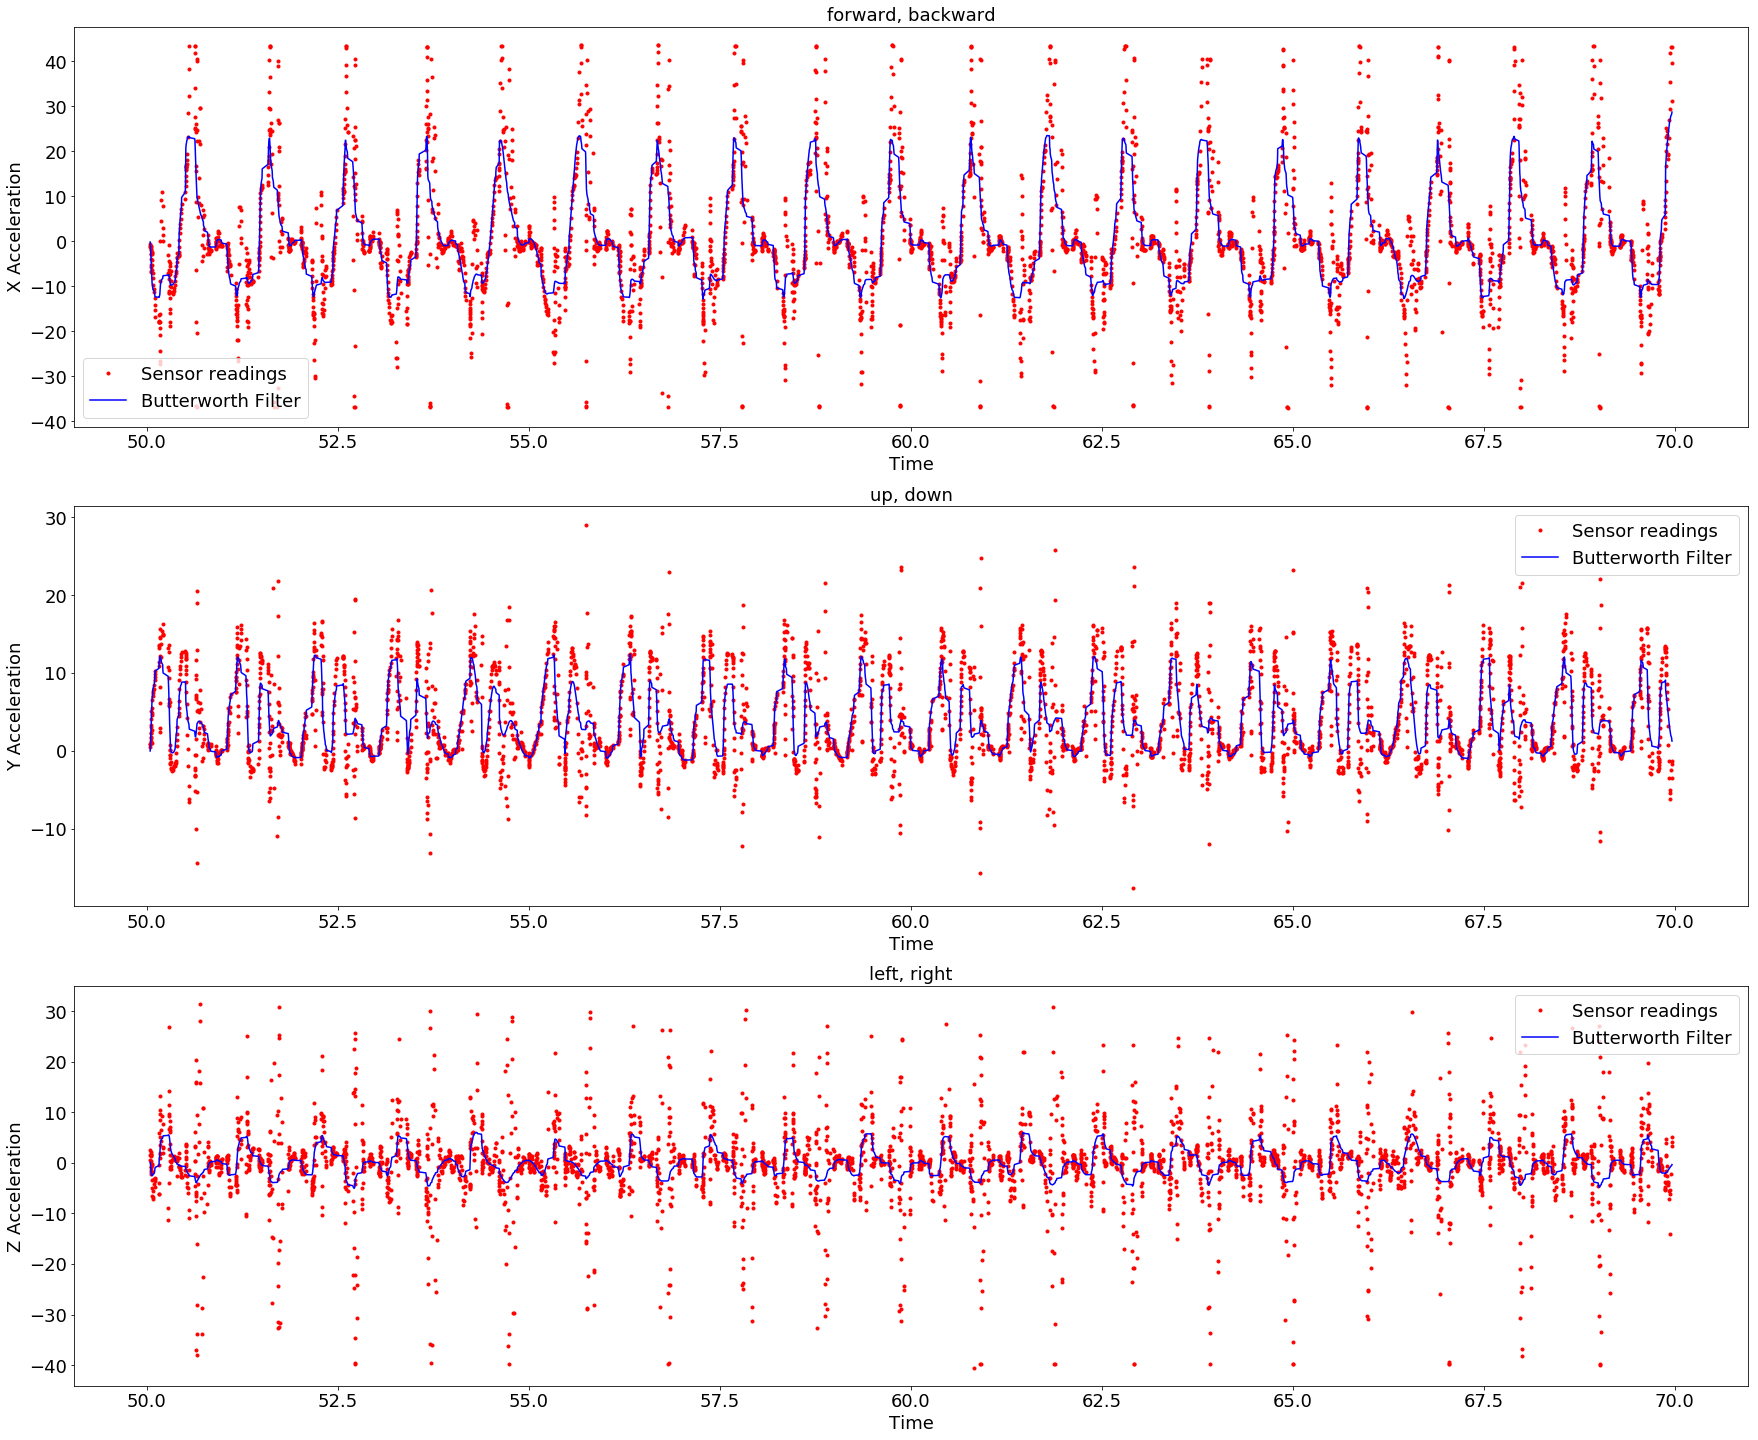

In [13]:
#Butterworth filter
#male_180_rightfoot_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ax'], 'r.')	#forward, backward []
plt.title('forward, backward')
b_male_180_rightfoot_walking, a_male_180_rightfoot_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_rightfoot_walking_x = signal.filtfilt(b_male_180_rightfoot_walking, a_male_180_rightfoot_walking, male_180_rightfoot_walking['ax'])
t_male_180_rightfoot_walking = male_180_rightfoot_walking['time']
plt.plot(t_male_180_rightfoot_walking.values,low_passed_male_180_rightfoot_walking_x, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ay'], 'r.')	#up, down []
plt.title('up, down')
b_male_180_rightfoot_walking, a_male_180_rightfoot_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_rightfoot_walking_y = signal.filtfilt(b_male_180_rightfoot_walking, a_male_180_rightfoot_walking, male_180_rightfoot_walking['ay'])
t_male_180_rightfoot_walking = male_180_rightfoot_walking['time']
plt.plot(t_male_180_rightfoot_walking.values,low_passed_male_180_rightfoot_walking_y, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['az'], 'r.')	#left, right []
plt.title('left, right')
b_male_180_rightfoot_walking, a_male_180_rightfoot_walking = signal.butter(3, 0.04, btype='lowpass', analog=False)
low_passed_male_180_rightfoot_walking_z = signal.filtfilt(b_male_180_rightfoot_walking, a_male_180_rightfoot_walking, male_180_rightfoot_walking['az'])
t_male_180_rightfoot_walking = male_180_rightfoot_walking['time']
plt.plot(t_male_180_rightfoot_walking.values,low_passed_male_180_rightfoot_walking_z, "b-")
plt.legend(['Sensor readings', 'Butterworth Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

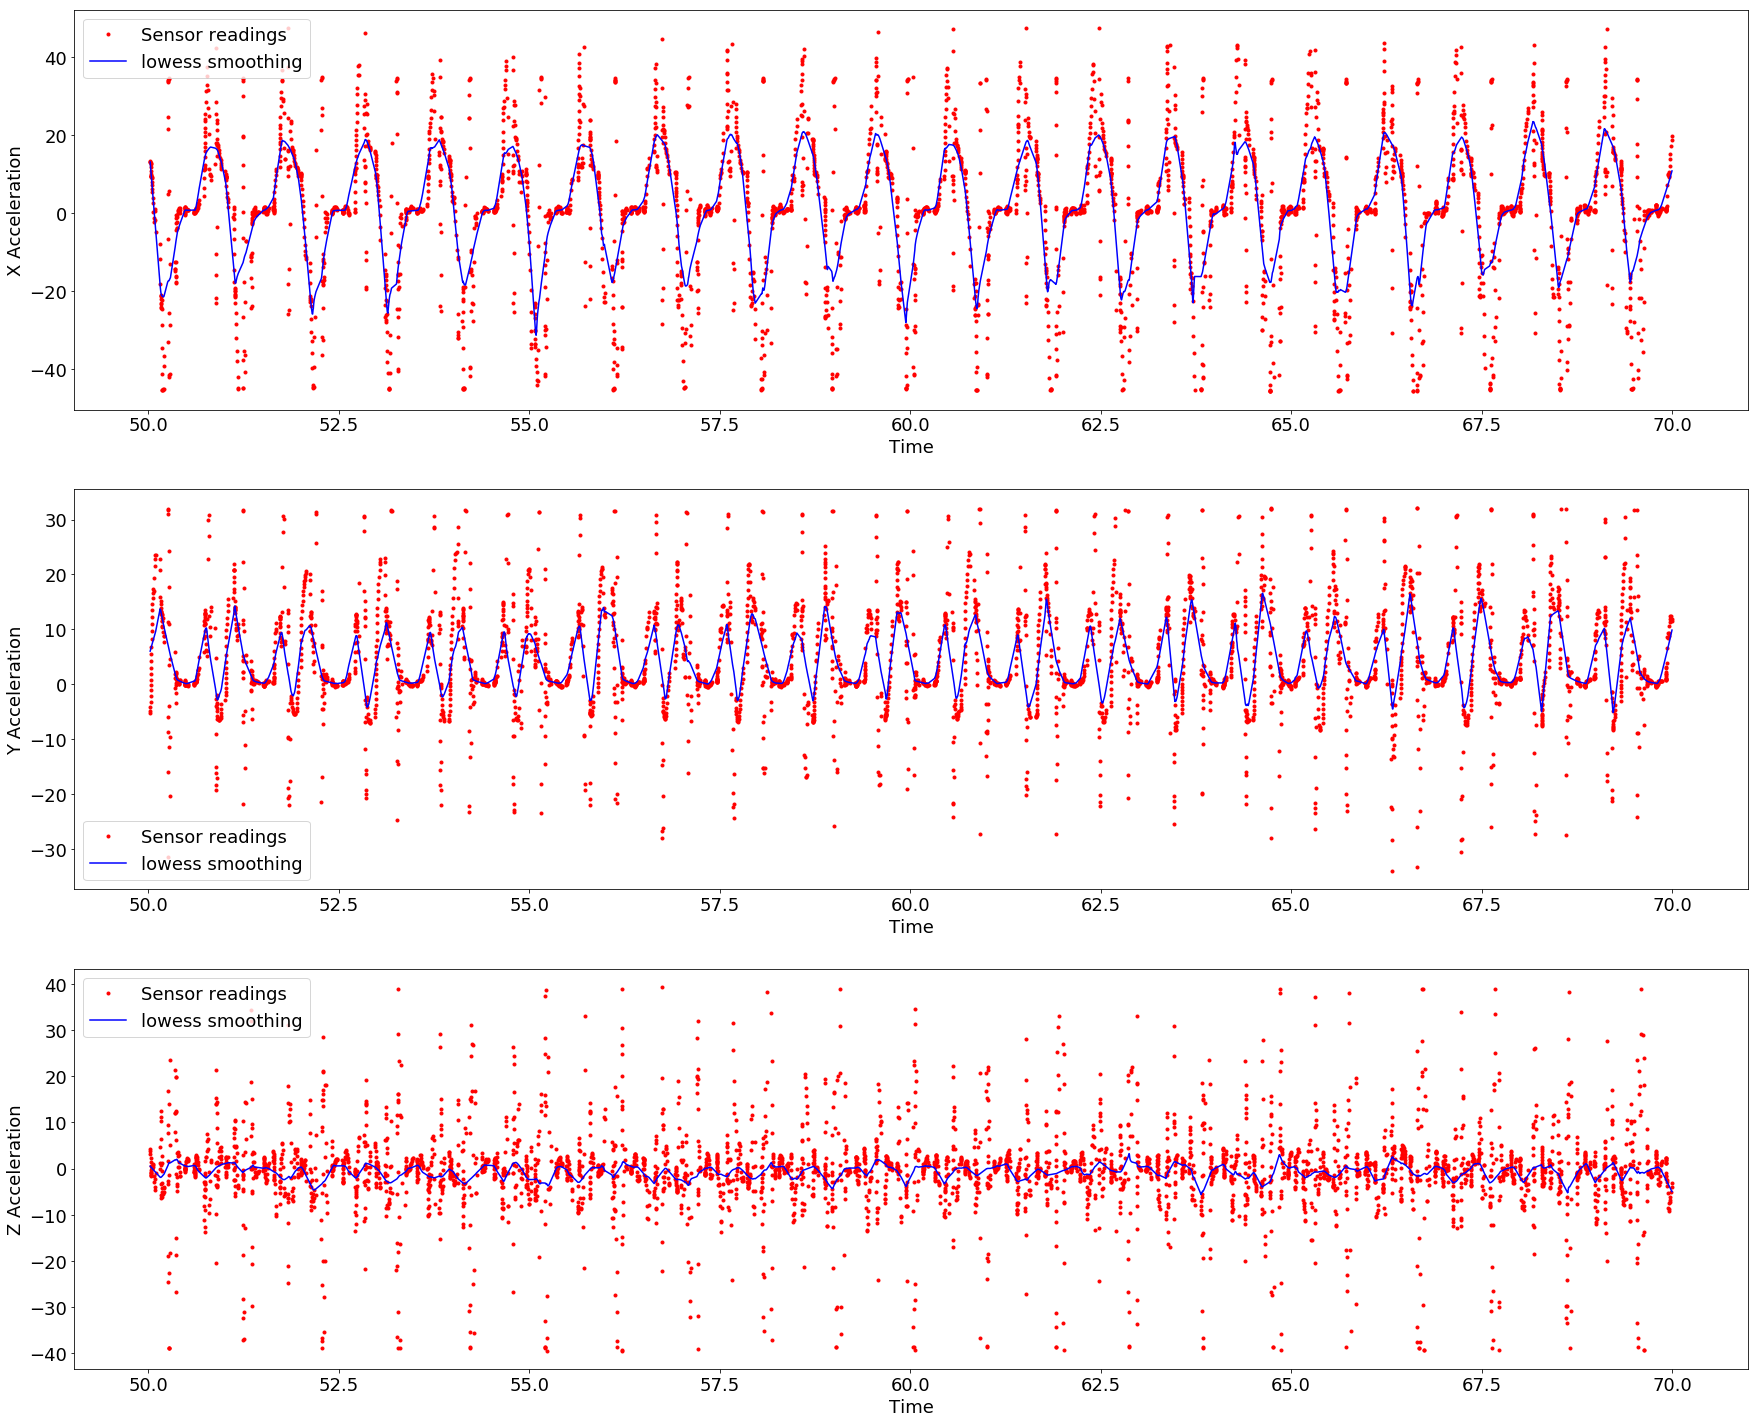

In [14]:
#lowess smoothing
#male_180_fast_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ax'], 'r.')	#forward, backward []
filtered_x = lowess(male_180_fast_walking['ax'], male_180_fast_walking['time'], frac=0.015)
plt.plot(filtered_x[:, 0], filtered_x[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ay'], 'r.')	#forward, backward []
filtered_y = lowess(male_180_fast_walking['ay'], male_180_fast_walking['time'], frac=0.015)
plt.plot(filtered_y[:, 0], filtered_y[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['az'], 'r.')	#forward, backward []
filtered_z = lowess(male_180_fast_walking['az'], male_180_fast_walking['time'], frac=0.015)
plt.plot(filtered_z[:, 0], filtered_z[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

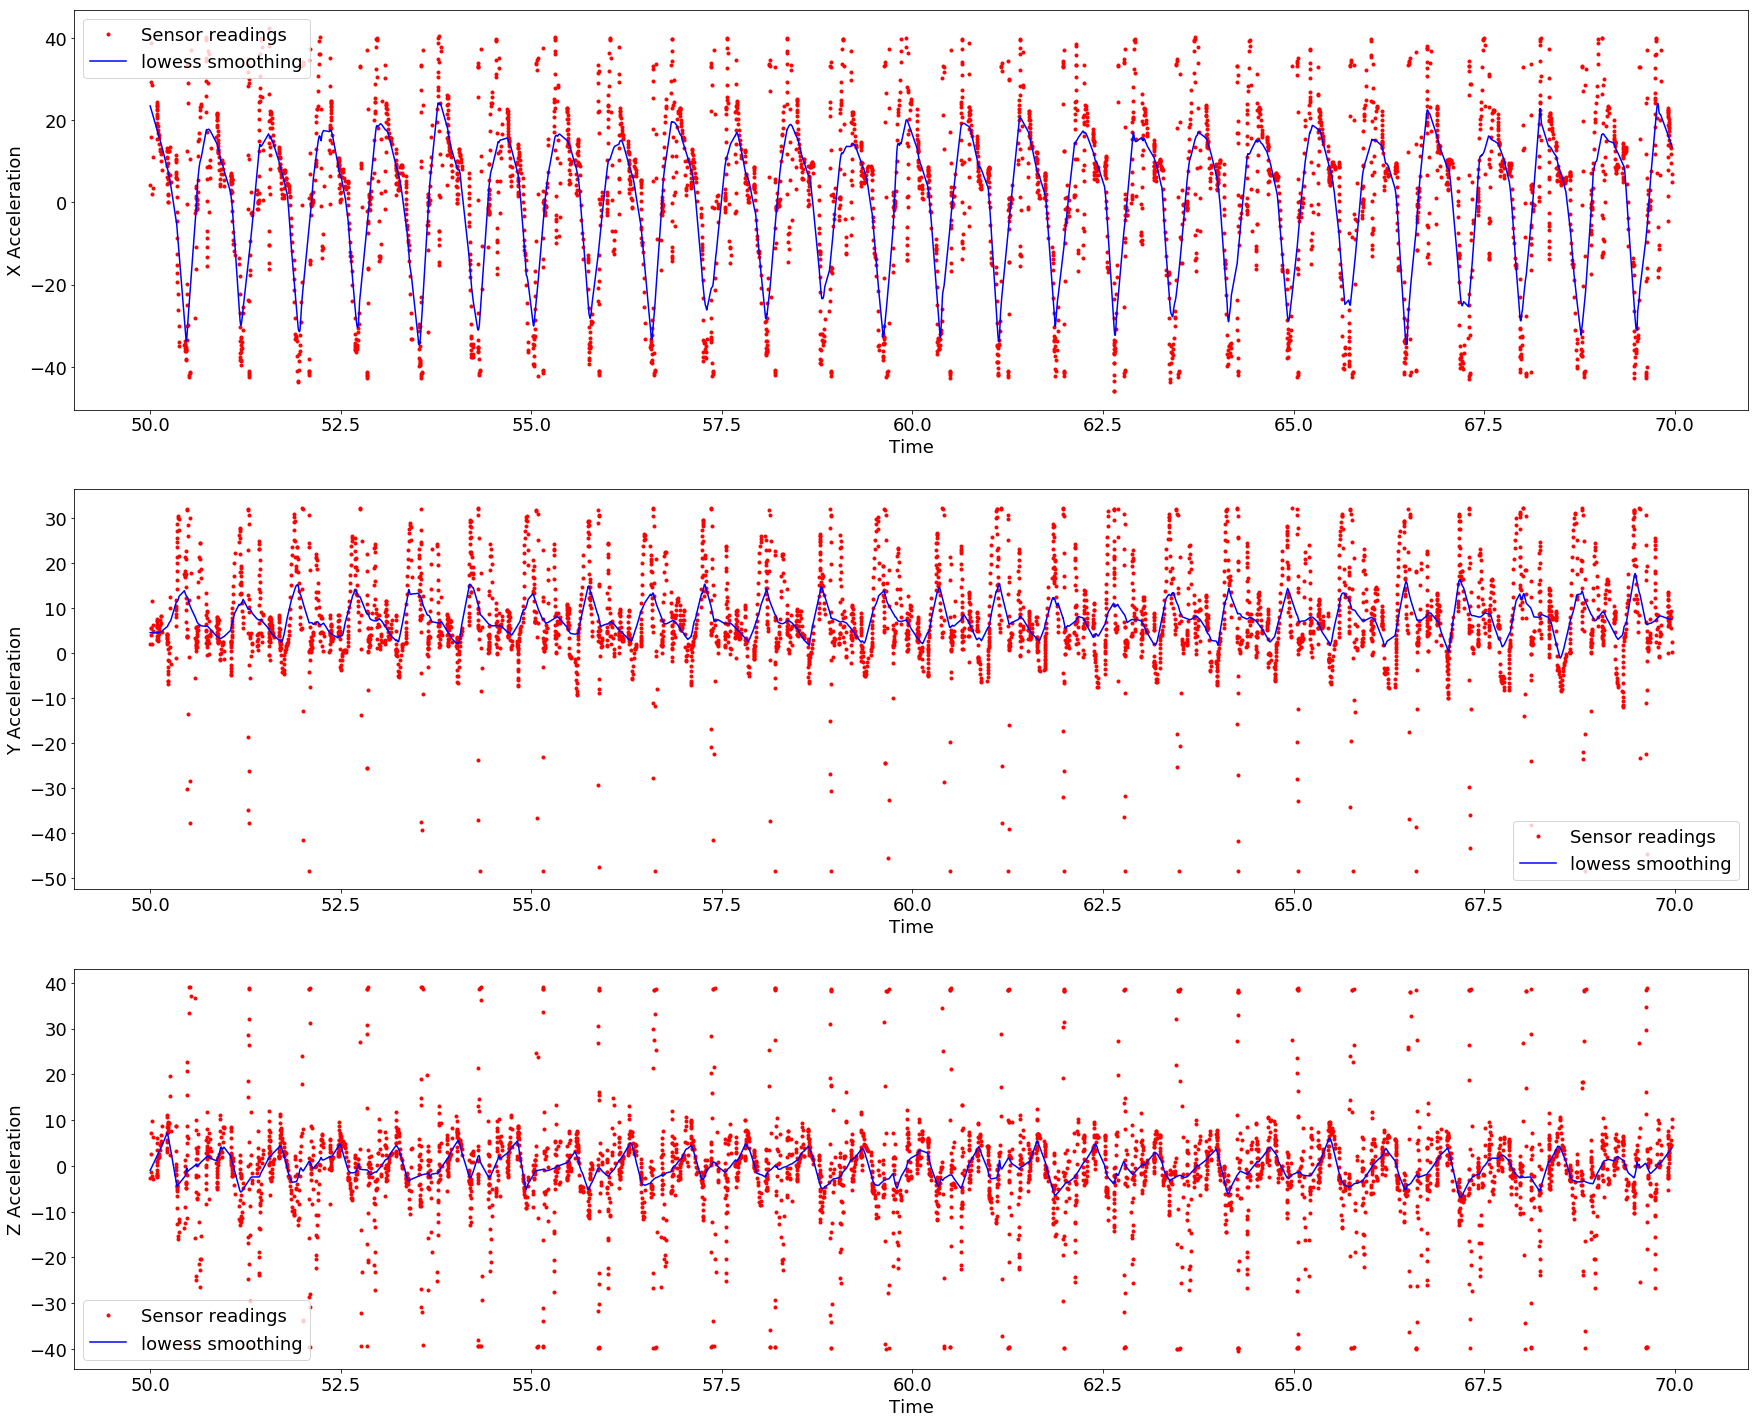

In [15]:
#lowess smoothing
#male_180_running

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_running['time'].values, male_180_running['ax'], 'r.')	#forward, backward []
filtered_x = lowess(male_180_running['ax'], male_180_running['time'], frac=0.015)
plt.plot(filtered_x[:, 0], filtered_x[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_running['time'].values, male_180_running['ay'], 'r.')	#forward, backward []
filtered_y = lowess(male_180_running['ay'], male_180_running['time'], frac=0.02)
plt.plot(filtered_y[:, 0], filtered_y[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_running['time'].values, male_180_running['az'], 'r.')	#forward, backward []
filtered_z = lowess(male_180_running['az'], male_180_running['time'], frac=0.015)
plt.plot(filtered_z[:, 0], filtered_z[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

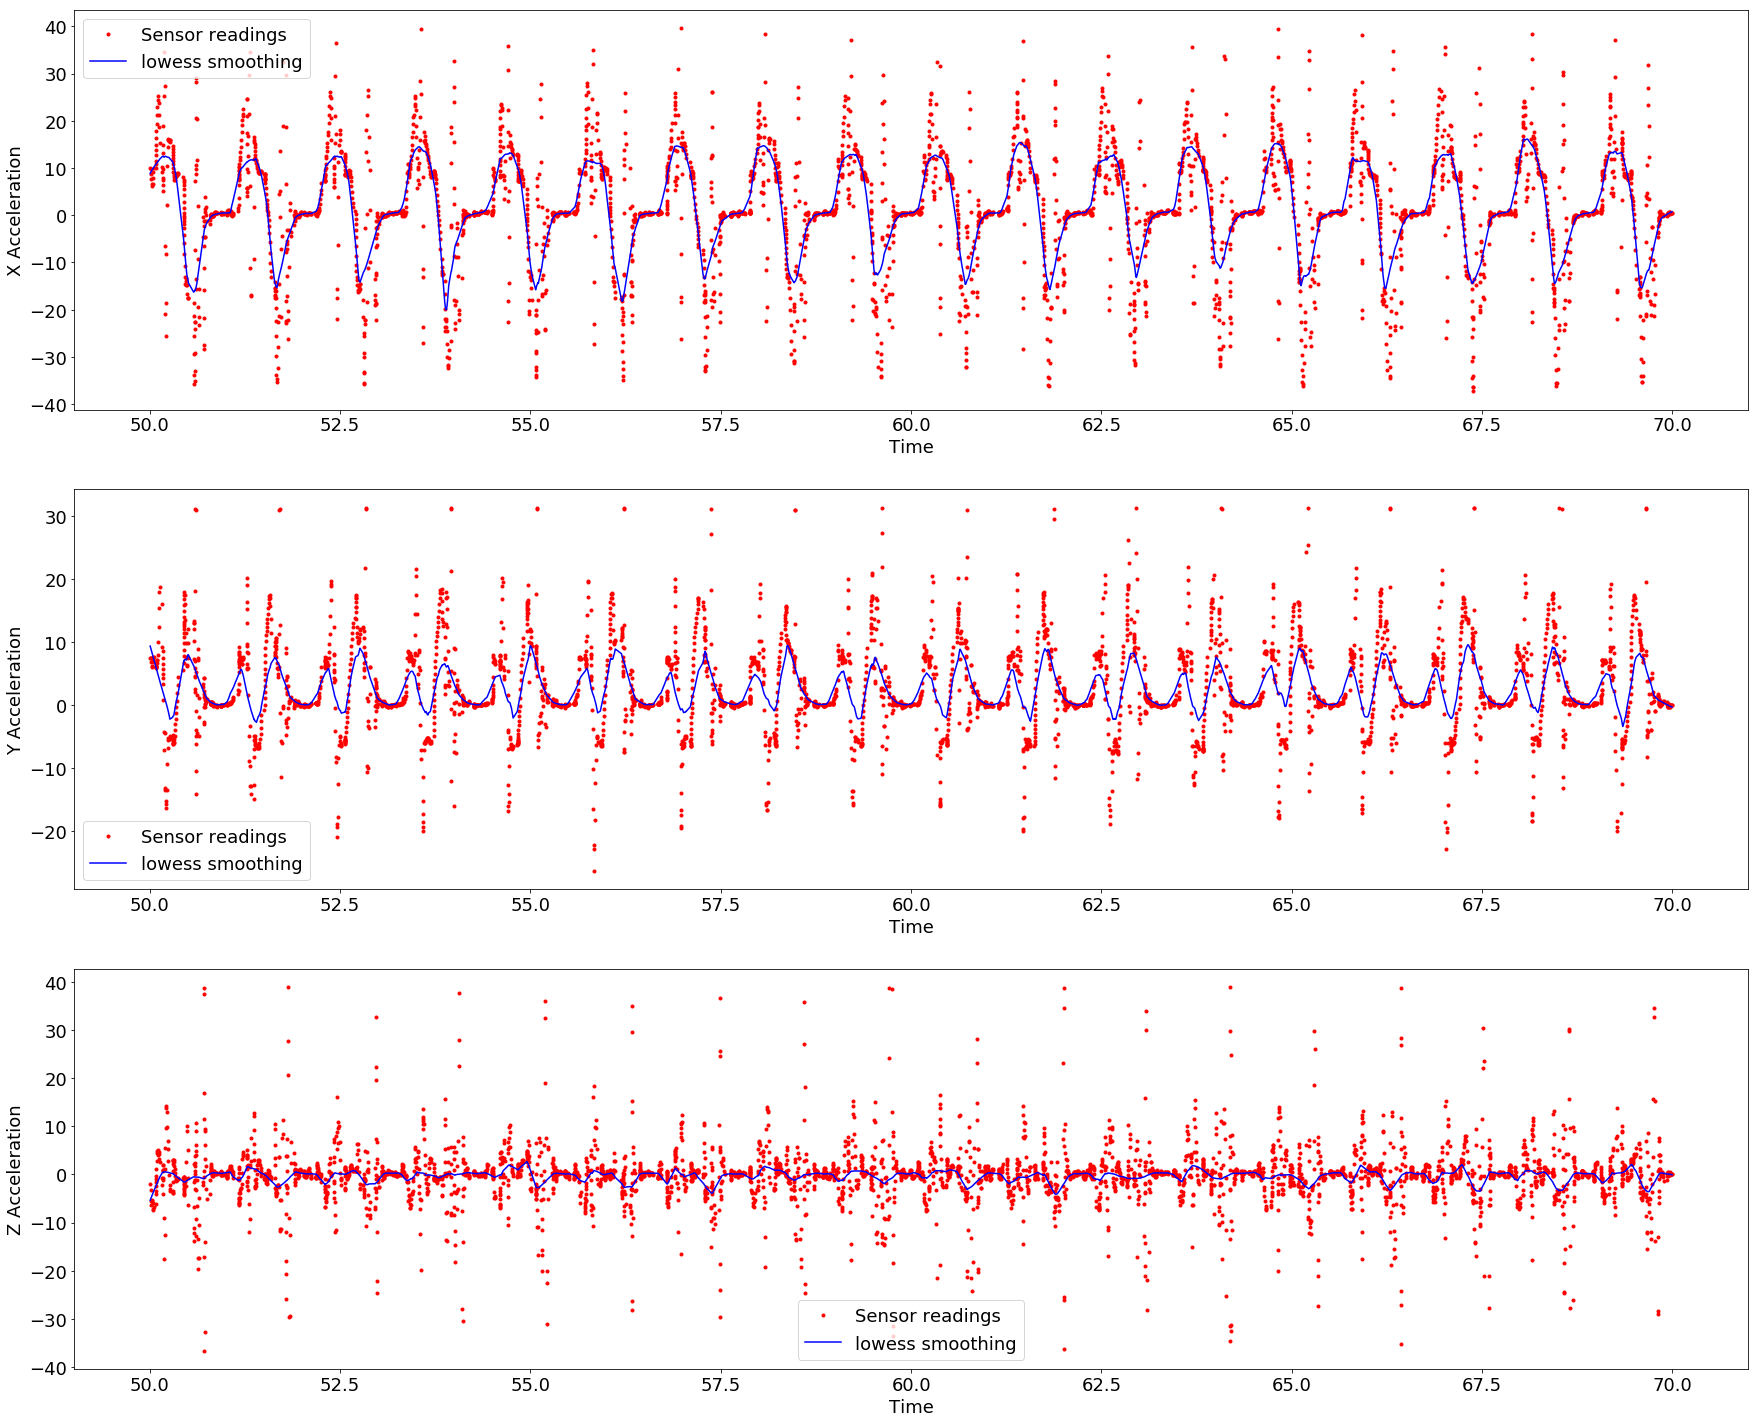

In [16]:
#lowess smoothing
#male_180_slow_walking
plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ax'], 'r.')	#forward, backward []
filtered_x = lowess(male_180_slow_walking['ax'], male_180_slow_walking['time'], frac=0.013)
plt.plot(filtered_x[:, 0], filtered_x[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ay'], 'r.')	#forward, backward []
filtered_y = lowess(male_180_slow_walking['ay'], male_180_slow_walking['time'], frac=0.02)
plt.plot(filtered_y[:, 0], filtered_y[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['az'], 'r.')	#forward, backward []
filtered_z = lowess(male_180_slow_walking['az'], male_180_slow_walking['time'], frac=0.015)
plt.plot(filtered_z[:, 0], filtered_z[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

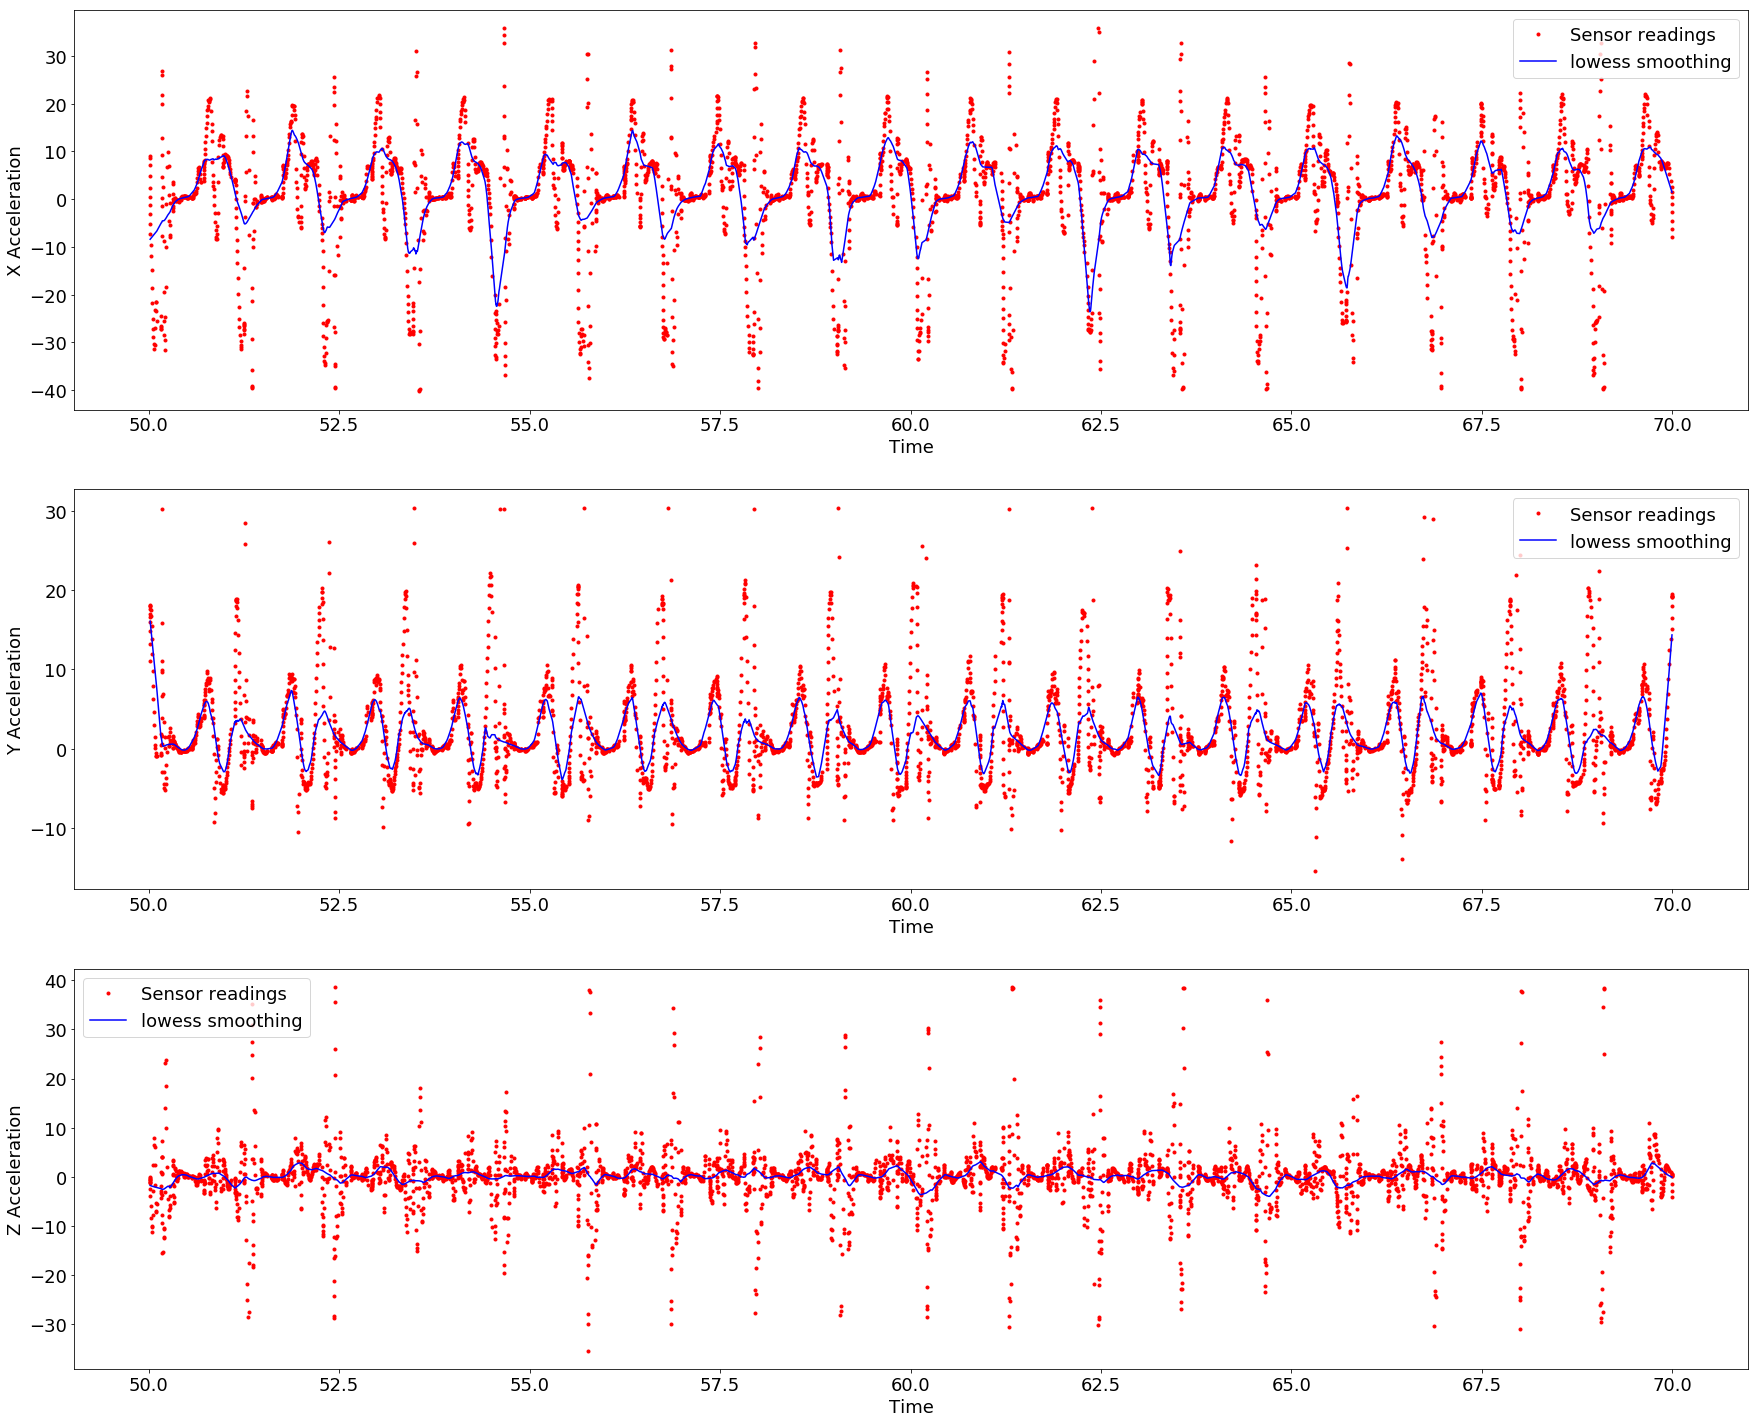

In [17]:
#lowess smoothing
#female_160_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(female_160_walking['time'].values, female_160_walking['ax'], 'r.')	#forward, backward []
filtered_x = lowess(female_160_walking['ax'], female_160_walking['time'], frac=0.015)
plt.plot(filtered_x[:, 0], filtered_x[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(female_160_walking['time'].values, female_160_walking['ay'], 'r.')	#forward, backward []
filtered_y = lowess(female_160_walking['ay'], female_160_walking['time'], frac=0.015)
plt.plot(filtered_y[:, 0], filtered_y[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(female_160_walking['time'].values, female_160_walking['az'], 'r.')	#forward, backward []
filtered_z = lowess(female_160_walking['az'], female_160_walking['time'], frac=0.015)
plt.plot(filtered_z[:, 0], filtered_z[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

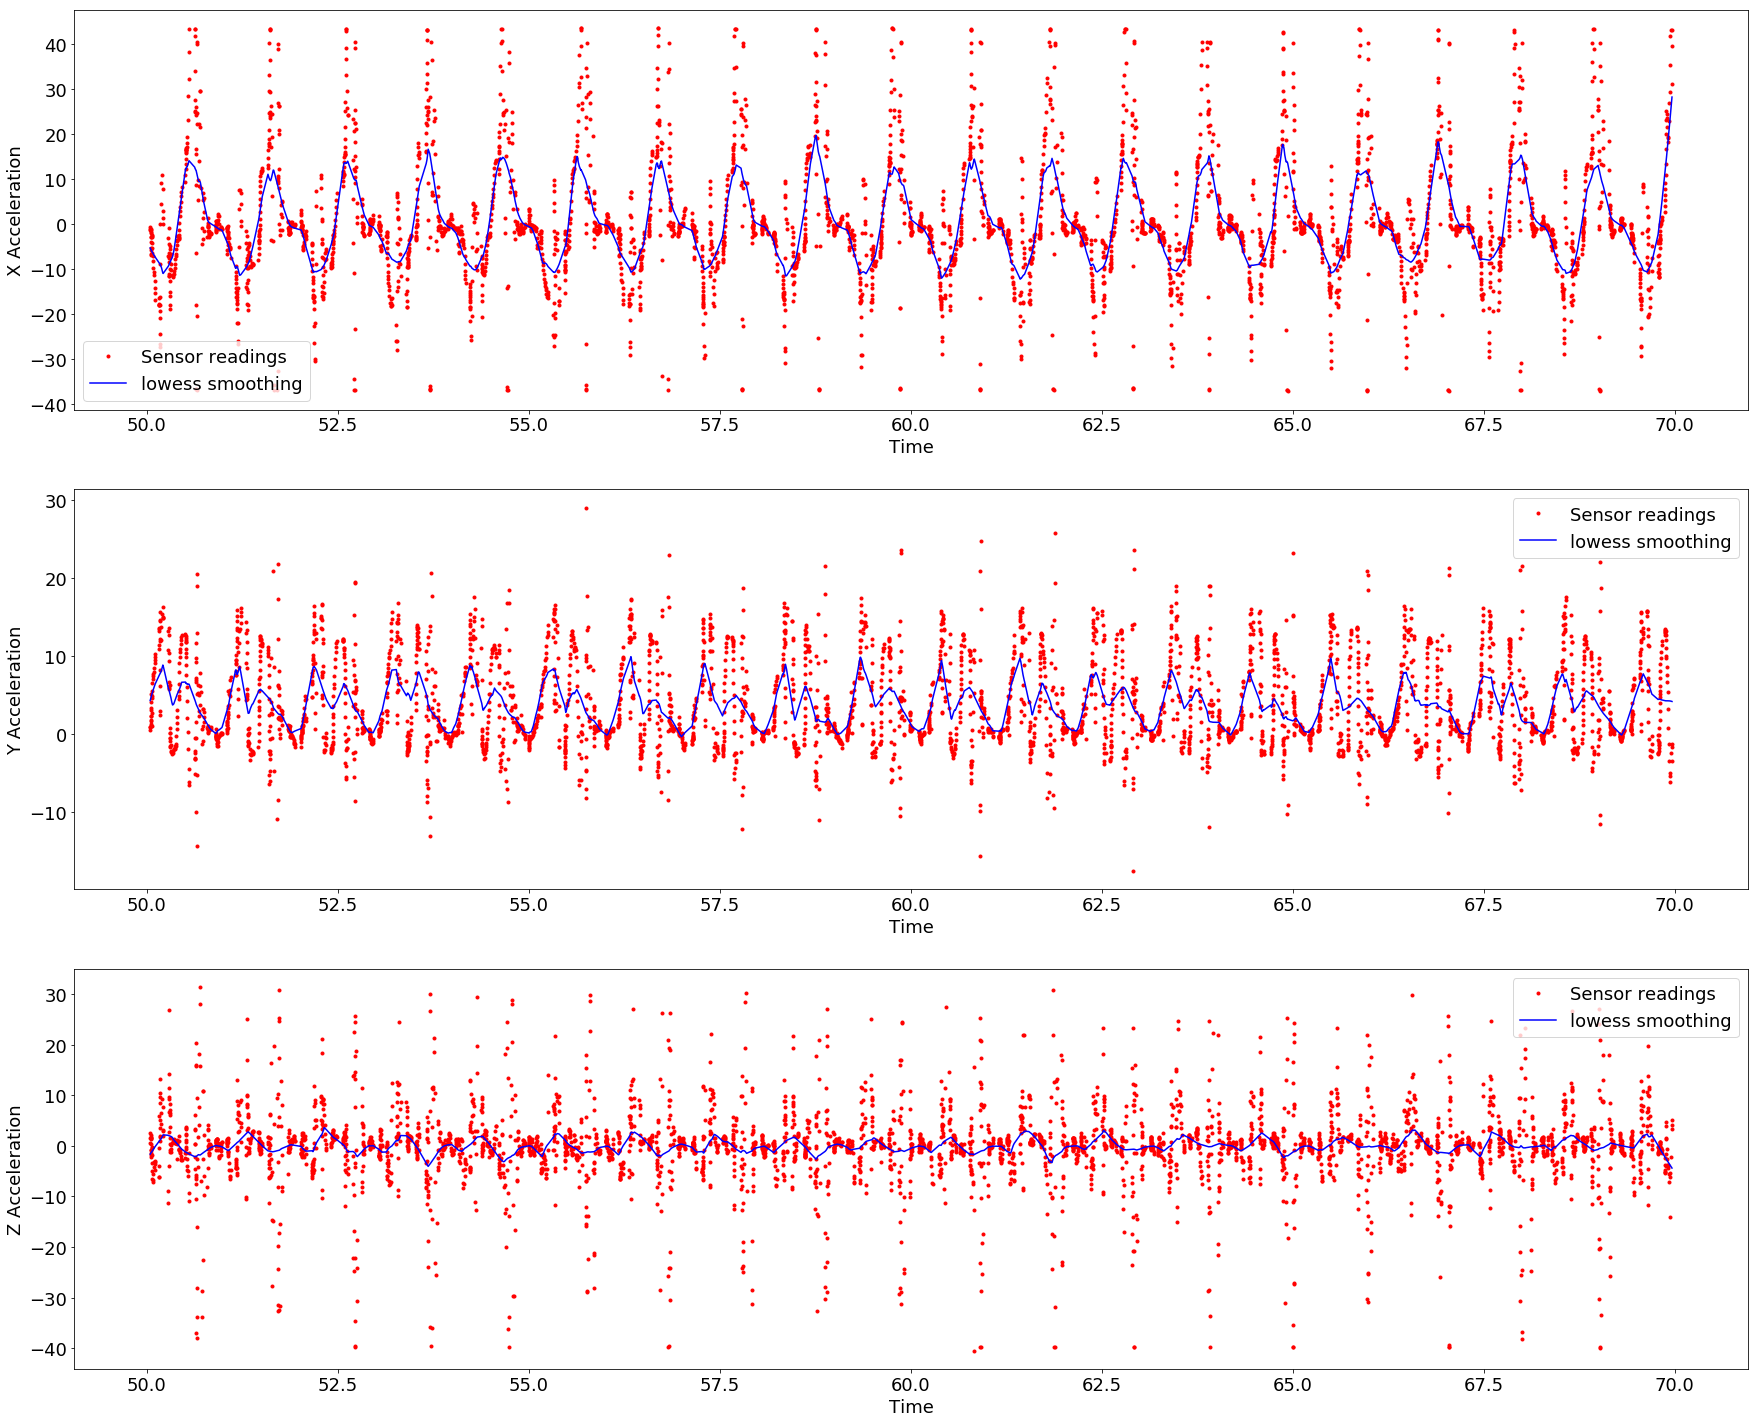

In [18]:
#lowess smoothing
#male_180_rightfoot_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ax'], 'r.')	#forward, backward []
filtered_x = lowess(male_180_rightfoot_walking['ax'], male_180_rightfoot_walking['time'], frac=0.02)
plt.plot(filtered_x[:, 0], filtered_x[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ay'], 'r.')	#forward, backward []
filtered_y = lowess(male_180_rightfoot_walking['ay'], male_180_rightfoot_walking['time'], frac=0.02)
plt.plot(filtered_y[:, 0], filtered_y[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['az'], 'r.')	#forward, backward []
filtered_z = lowess(male_180_rightfoot_walking['az'], male_180_rightfoot_walking['time'], frac=0.02)
plt.plot(filtered_z[:, 0], filtered_z[:, 1], 'b-')
plt.legend(['Sensor readings', 'lowess smoothing'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

Text(0, 0.5, 'Z Acceleration')

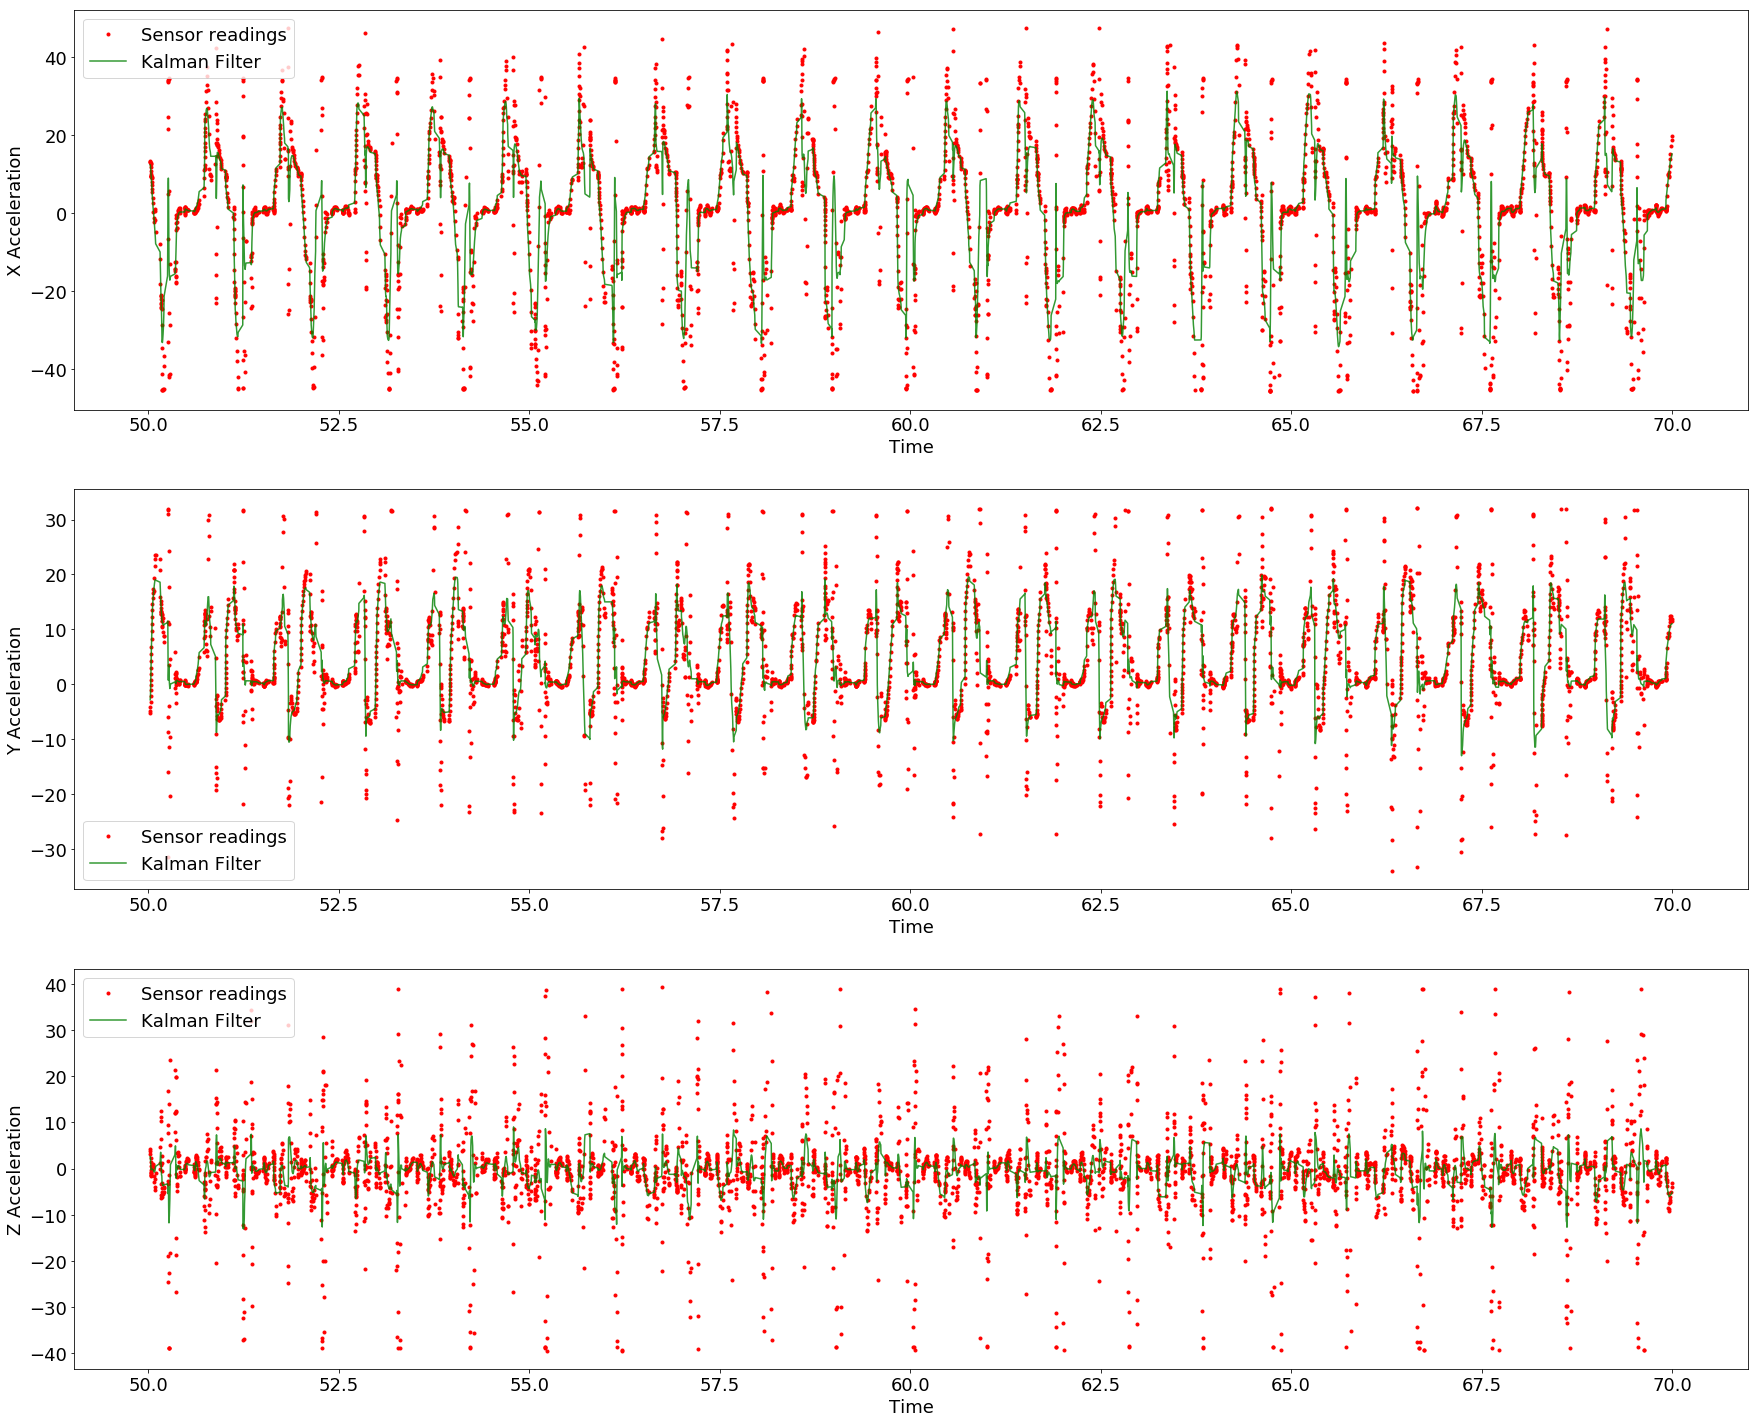

In [19]:
#Kalman Filtering
#male_180_fast_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ax'], 'r.')	#forward, backward []
kalman_data_male_180_fast_walking = male_180_fast_walking[['ax', 'ay', 'az']]
initial_state_male_180_fast_walking = kalman_data_male_180_fast_walking.iloc[0]
observation_covariance_male_180_fast_walking_x = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_fast_walking_x = np.diag([2, 2, 2]) ** 2
transition_male_180_fast_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_fast_walking_x = KalmanFilter(initial_state_mean = initial_state_male_180_fast_walking, initial_state_covariance = observation_covariance_male_180_fast_walking_x, observation_covariance = observation_covariance_male_180_fast_walking_x, transition_covariance = transition_covariance_male_180_fast_walking_x, transition_matrices = transition_male_180_fast_walking)
kalman_smoothed_male_180_fast_walking_x, _ = kf_male_180_fast_walking_x.smooth(kalman_data_male_180_fast_walking)
plt.plot(male_180_fast_walking['time'], kalman_smoothed_male_180_fast_walking_x[:, 0], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['ay'], 'r.')	#forward, backward []
kalman_data_male_180_fast_walking = male_180_fast_walking[['ax', 'ay', 'az']]
initial_state_male_180_fast_walking_y = kalman_data_male_180_fast_walking.iloc[0]
observation_covariance_male_180_fast_walking_y = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_fast_walking_y = np.diag([2, 2, 2]) ** 2
transition_male_180_fast_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_fast_walking_y = KalmanFilter(initial_state_mean = initial_state_male_180_fast_walking, initial_state_covariance = observation_covariance_male_180_fast_walking_y, observation_covariance = observation_covariance_male_180_fast_walking_y, transition_covariance = transition_covariance_male_180_fast_walking_y, transition_matrices = transition_male_180_fast_walking)
kalman_smoothed_male_180_fast_walking_y, _ = kf_male_180_fast_walking_y.smooth(kalman_data_male_180_fast_walking)
plt.plot(male_180_fast_walking['time'], kalman_smoothed_male_180_fast_walking_y[:, 1], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_fast_walking['time'].values, male_180_fast_walking['az'], 'r.')	#forward, backward []
kalman_data_male_180_fast_walking = male_180_fast_walking[['ax', 'ay', 'az']]
initial_state_male_180_fast_walking = kalman_data_male_180_fast_walking.iloc[0]
observation_covariance_male_180_fast_walking_z = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_fast_walking_z = np.diag([2, 2, 2]) ** 2
transition_male_180_fast_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_fast_walking_z = KalmanFilter(initial_state_mean = initial_state_male_180_fast_walking, initial_state_covariance = observation_covariance_male_180_fast_walking_z, observation_covariance = observation_covariance_male_180_fast_walking_z, transition_covariance = transition_covariance_male_180_fast_walking_z, transition_matrices = transition_male_180_fast_walking)
kalman_smoothed_male_180_fast_walking_z, _ = kf_male_180_fast_walking_z.smooth(kalman_data_male_180_fast_walking)
plt.plot(male_180_fast_walking['time'], kalman_smoothed_male_180_fast_walking_z[:, 2], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')



Text(0, 0.5, 'Z Acceleration')

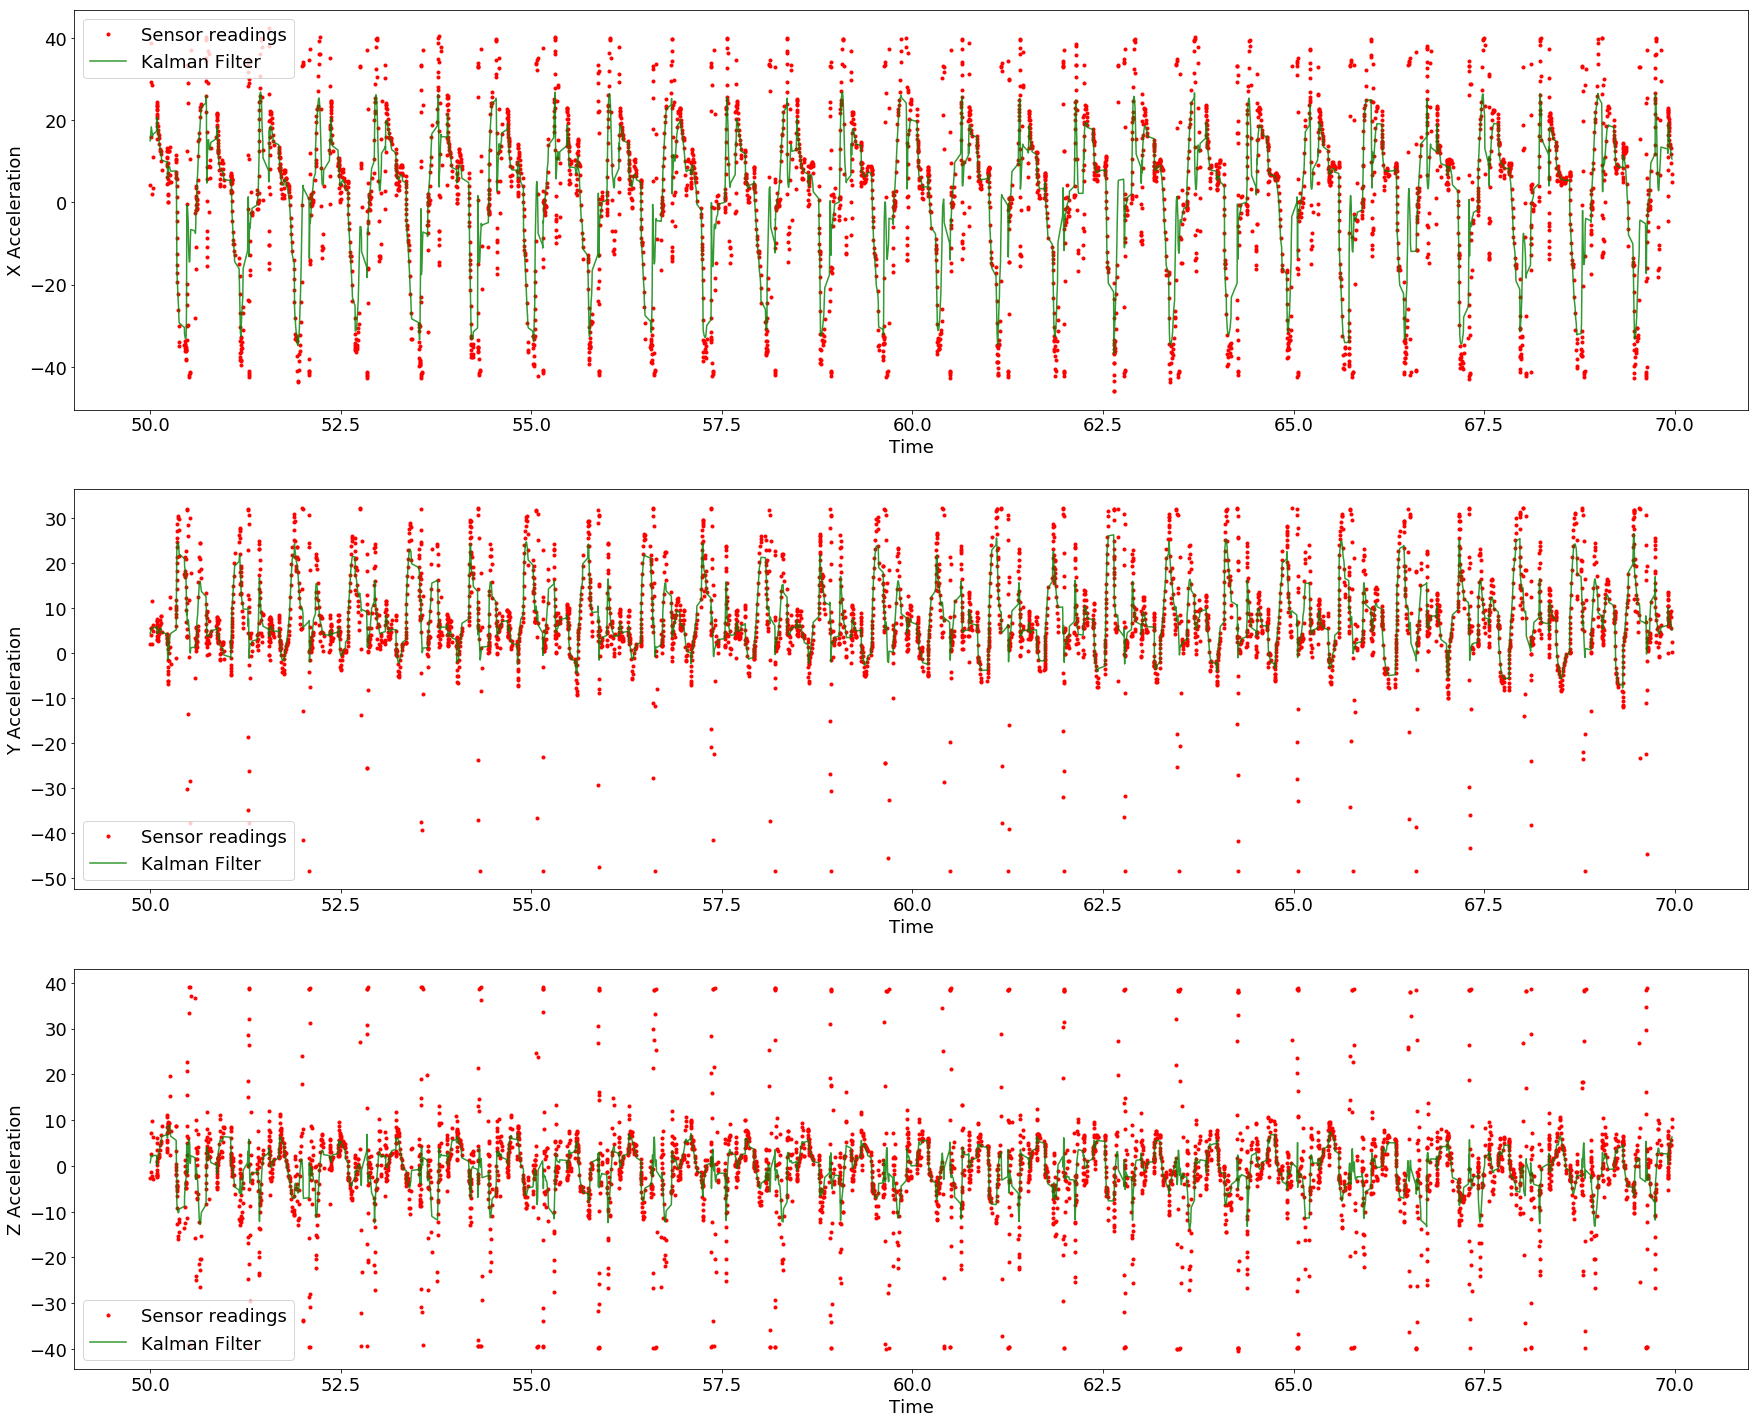

In [20]:
#Kalman Filtering
#male_180_running

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_running['time'].values, male_180_running['ax'], 'r.')	#forward, backward []
kalman_data_male_180_running = male_180_running[['ax', 'ay', 'az']]
initial_state_male_180_running = kalman_data_male_180_running.iloc[0]
observation_covariance_male_180_running_x = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_running_x = np.diag([2, 2, 2]) ** 2
transition_male_180_running = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_running_x = KalmanFilter(initial_state_mean = initial_state_male_180_running, initial_state_covariance = observation_covariance_male_180_running_x, observation_covariance = observation_covariance_male_180_running_x, transition_covariance = transition_covariance_male_180_running_x, transition_matrices = transition_male_180_running)
kalman_smoothed_male_180_running_x, _ = kf_male_180_running_x.smooth(kalman_data_male_180_running)
plt.plot(male_180_running['time'], kalman_smoothed_male_180_running_x[:, 0], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_running['time'].values, male_180_running['ay'], 'r.')	#forward, backward []
kalman_data_male_180_running = male_180_running[['ax', 'ay', 'az']]
initial_state_male_180_running_y = kalman_data_male_180_running.iloc[0]
observation_covariance_male_180_running_y = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_running_y = np.diag([2, 2, 2]) ** 2
transition_male_180_running = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_running_y = KalmanFilter(initial_state_mean = initial_state_male_180_running, initial_state_covariance = observation_covariance_male_180_running_y, observation_covariance = observation_covariance_male_180_running_y, transition_covariance = transition_covariance_male_180_running_y, transition_matrices = transition_male_180_running)
kalman_smoothed_male_180_running_y, _ = kf_male_180_running_y.smooth(kalman_data_male_180_running)
plt.plot(male_180_running['time'], kalman_smoothed_male_180_running_y[:, 1], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_running['time'].values, male_180_running['az'], 'r.')	#forward, backward []
kalman_data_male_180_running = male_180_running[['ax', 'ay', 'az']]
initial_state_male_180_running = kalman_data_male_180_running.iloc[0]
observation_covariance_male_180_running_z = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_running_z = np.diag([2, 2, 2]) ** 2
transition_male_180_running = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_running_z = KalmanFilter(initial_state_mean = initial_state_male_180_running, initial_state_covariance = observation_covariance_male_180_running_z, observation_covariance = observation_covariance_male_180_running_z, transition_covariance = transition_covariance_male_180_running_z, transition_matrices = transition_male_180_running)
kalman_smoothed_male_180_running_z, _ = kf_male_180_running_z.smooth(kalman_data_male_180_running)
plt.plot(male_180_running['time'], kalman_smoothed_male_180_running_z[:, 2], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')


Text(0, 0.5, 'Z Acceleration')

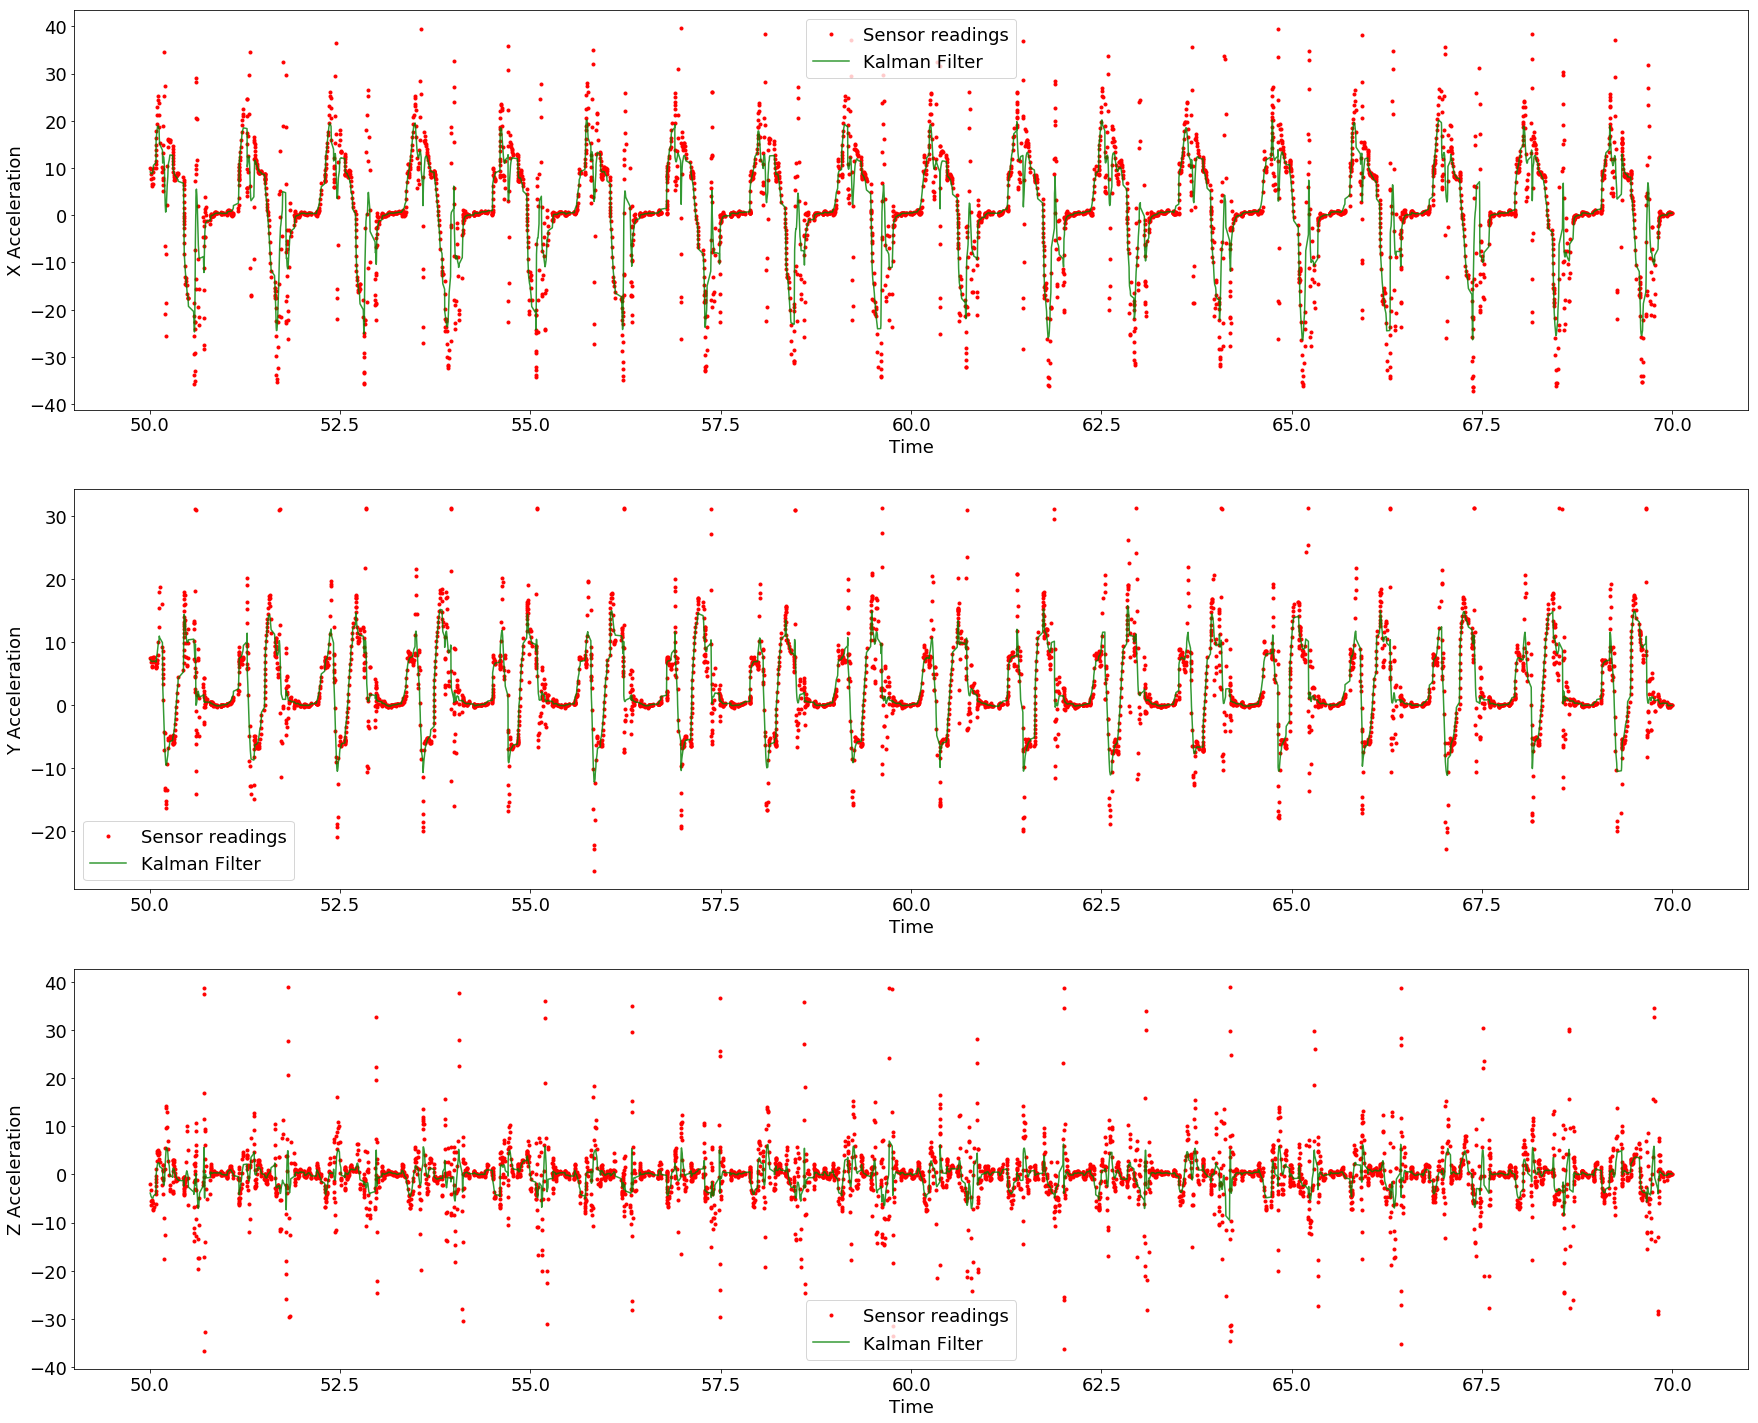

In [21]:
#Kalman Filtering
#male_180_slow_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ax'], 'r.')	#forward, backward []
kalman_data_male_180_slow_walking = male_180_slow_walking[['ax', 'ay', 'az']]
initial_state_male_180_slow_walking = kalman_data_male_180_slow_walking.iloc[0]
observation_covariance_male_180_slow_walking_x = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_slow_walking_x = np.diag([2, 2, 2]) ** 2
transition_male_180_slow_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_slow_walking_x = KalmanFilter(initial_state_mean = initial_state_male_180_slow_walking, initial_state_covariance = observation_covariance_male_180_slow_walking_x, observation_covariance = observation_covariance_male_180_slow_walking_x, transition_covariance = transition_covariance_male_180_slow_walking_x, transition_matrices = transition_male_180_slow_walking)
kalman_smoothed_male_180_slow_walking_x, _ = kf_male_180_slow_walking_x.smooth(kalman_data_male_180_slow_walking)
plt.plot(male_180_slow_walking['time'], kalman_smoothed_male_180_slow_walking_x[:, 0], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['ay'], 'r.')	#forward, backward []
kalman_data_male_180_slow_walking = male_180_slow_walking[['ax', 'ay', 'az']]
initial_state_male_180_slow_walking_y = kalman_data_male_180_slow_walking.iloc[0]
observation_covariance_male_180_slow_walking_y = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_slow_walking_y = np.diag([2, 2, 2]) ** 2
transition_male_180_slow_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_slow_walking_y = KalmanFilter(initial_state_mean = initial_state_male_180_slow_walking, initial_state_covariance = observation_covariance_male_180_slow_walking_y, observation_covariance = observation_covariance_male_180_slow_walking_y, transition_covariance = transition_covariance_male_180_slow_walking_y, transition_matrices = transition_male_180_slow_walking)
kalman_smoothed_male_180_slow_walking_y, _ = kf_male_180_slow_walking_y.smooth(kalman_data_male_180_slow_walking)
plt.plot(male_180_slow_walking['time'], kalman_smoothed_male_180_slow_walking_y[:, 1], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_slow_walking['time'].values, male_180_slow_walking['az'], 'r.')	#forward, backward []
kalman_data_male_180_slow_walking = male_180_slow_walking[['ax', 'ay', 'az']]
initial_state_male_180_slow_walking = kalman_data_male_180_slow_walking.iloc[0]
observation_covariance_male_180_slow_walking_z = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_slow_walking_z = np.diag([2, 2, 2]) ** 2
transition_male_180_slow_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_slow_walking_z = KalmanFilter(initial_state_mean = initial_state_male_180_slow_walking, initial_state_covariance = observation_covariance_male_180_slow_walking_z, observation_covariance = observation_covariance_male_180_slow_walking_z, transition_covariance = transition_covariance_male_180_slow_walking_z, transition_matrices = transition_male_180_slow_walking)
kalman_smoothed_male_180_slow_walking_z, _ = kf_male_180_slow_walking_z.smooth(kalman_data_male_180_slow_walking)
plt.plot(male_180_slow_walking['time'], kalman_smoothed_male_180_slow_walking_z[:, 2], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')


Text(0, 0.5, 'Z Acceleration')

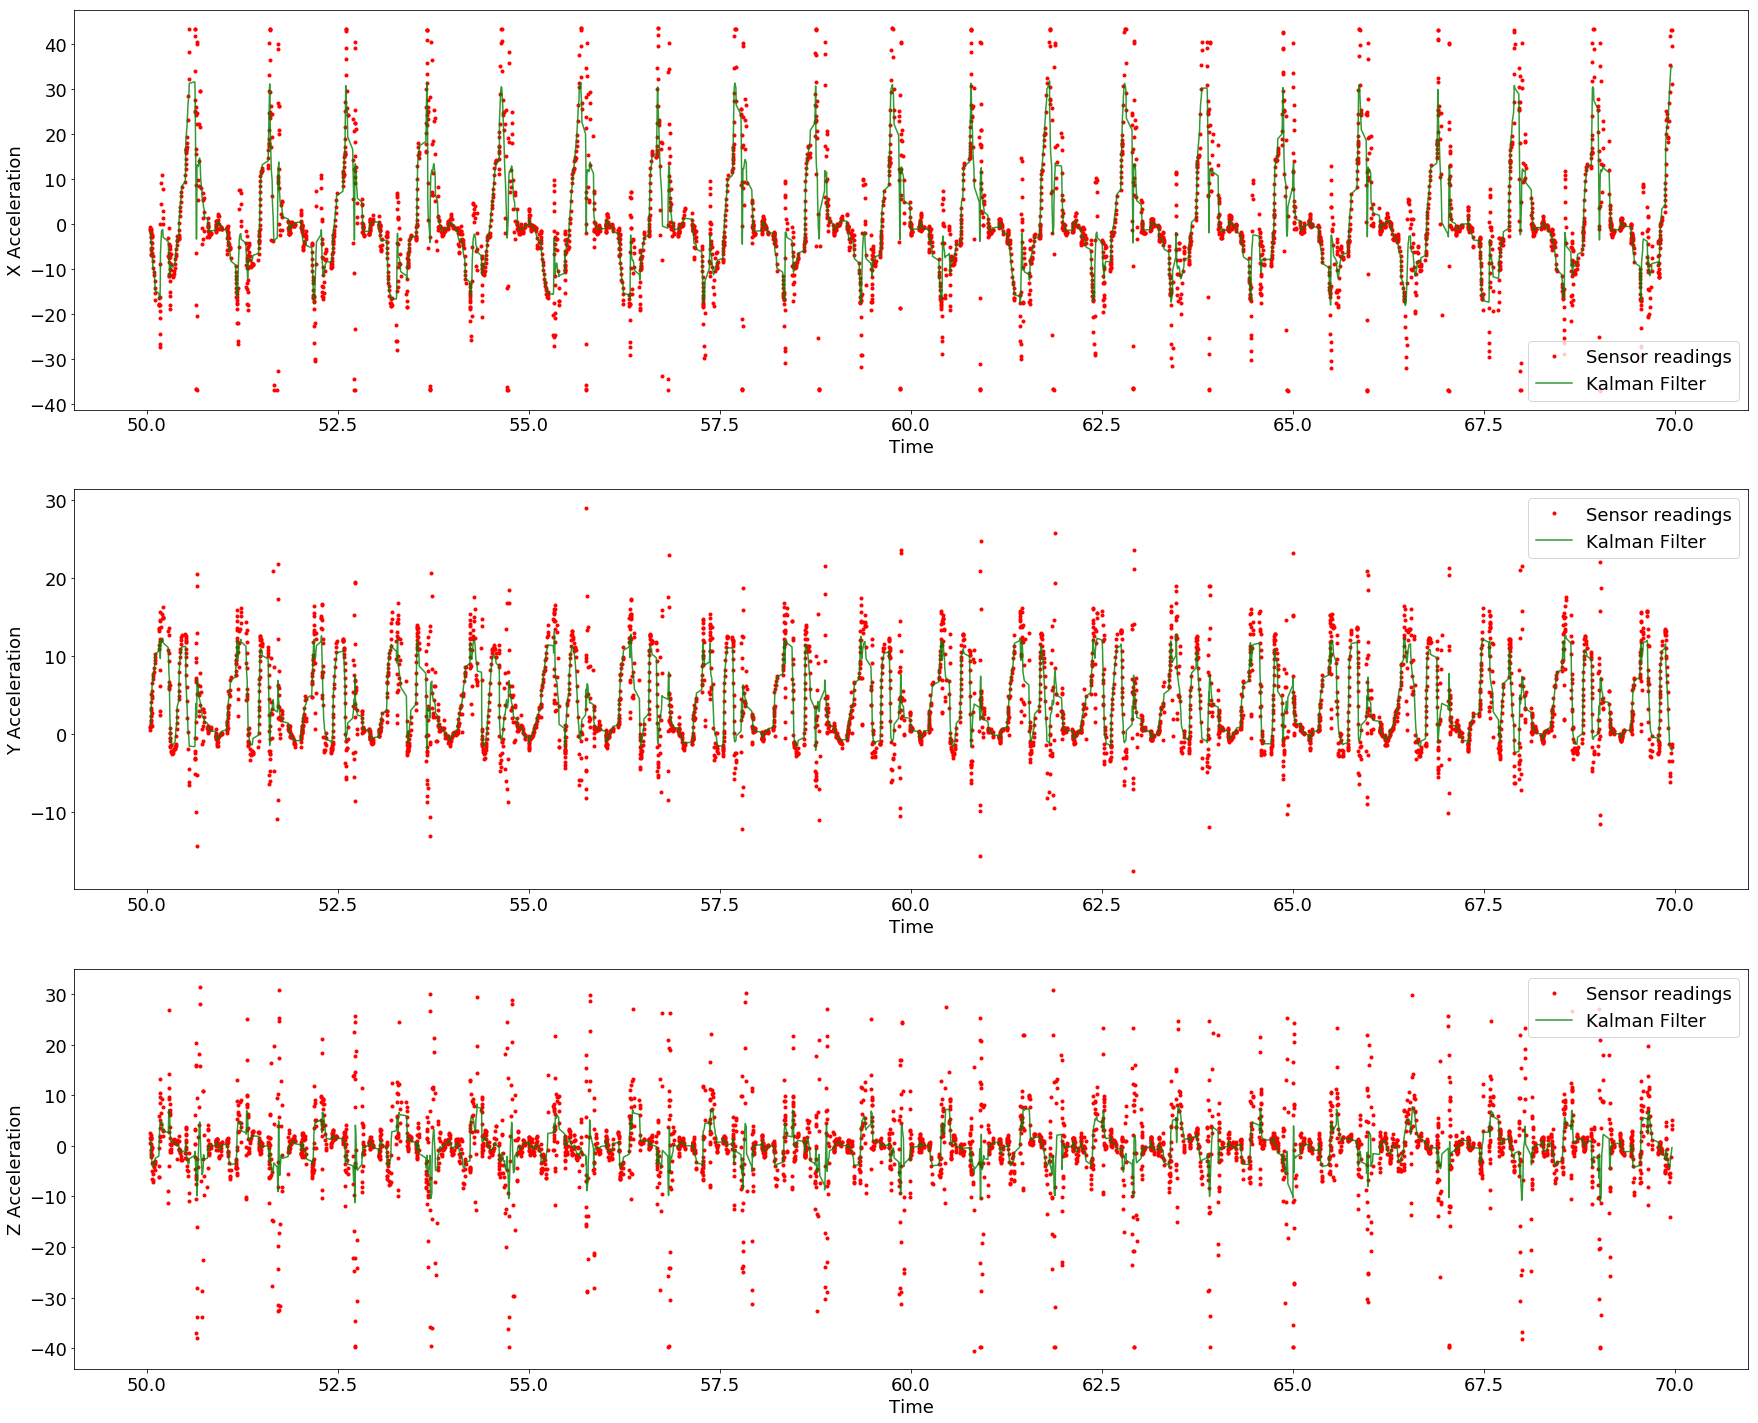

In [22]:
#Kalman Filtering
#male_180_rightfoot_walking

plt.figure(figsize=(30, 25))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
plt.subplot(3, 1, 1)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ax'], 'r.')	#forward, backward []
kalman_data_male_180_rightfoot_walking = male_180_rightfoot_walking[['ax', 'ay', 'az']]
initial_state_male_180_rightfoot_walking = kalman_data_male_180_rightfoot_walking.iloc[0]
observation_covariance_male_180_rightfoot_walking_x = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_rightfoot_walking_x = np.diag([2, 2, 2]) ** 2
transition_male_180_rightfoot_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_rightfoot_walking_x = KalmanFilter(initial_state_mean = initial_state_male_180_rightfoot_walking, initial_state_covariance = observation_covariance_male_180_rightfoot_walking_x, observation_covariance = observation_covariance_male_180_rightfoot_walking_x, transition_covariance = transition_covariance_male_180_rightfoot_walking_x, transition_matrices = transition_male_180_rightfoot_walking)
kalman_smoothed_male_180_rightfoot_walking_x, _ = kf_male_180_rightfoot_walking_x.smooth(kalman_data_male_180_rightfoot_walking)
plt.plot(male_180_rightfoot_walking['time'], kalman_smoothed_male_180_rightfoot_walking_x[:, 0], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('X Acceleration')

plt.subplot(3, 1, 2)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['ay'], 'r.')	#forward, backward []
kalman_data_male_180_rightfoot_walking = male_180_rightfoot_walking[['ax', 'ay', 'az']]
initial_state_male_180_rightfoot_walking_y = kalman_data_male_180_rightfoot_walking.iloc[0]
observation_covariance_male_180_rightfoot_walking_y = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_rightfoot_walking_y = np.diag([2, 2, 2]) ** 2
transition_male_180_rightfoot_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_rightfoot_walking_y = KalmanFilter(initial_state_mean = initial_state_male_180_rightfoot_walking, initial_state_covariance = observation_covariance_male_180_rightfoot_walking_y, observation_covariance = observation_covariance_male_180_rightfoot_walking_y, transition_covariance = transition_covariance_male_180_rightfoot_walking_y, transition_matrices = transition_male_180_rightfoot_walking)
kalman_smoothed_male_180_rightfoot_walking_y, _ = kf_male_180_rightfoot_walking_y.smooth(kalman_data_male_180_rightfoot_walking)
plt.plot(male_180_rightfoot_walking['time'], kalman_smoothed_male_180_rightfoot_walking_y[:, 1], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Y Acceleration')

plt.subplot(3, 1, 3)
plt.plot(male_180_rightfoot_walking['time'].values, male_180_rightfoot_walking['az'], 'r.')	#forward, backward []
kalman_data_male_180_rightfoot_walking = male_180_rightfoot_walking[['ax', 'ay', 'az']]
initial_state_male_180_rightfoot_walking = kalman_data_male_180_rightfoot_walking.iloc[0]
observation_covariance_male_180_rightfoot_walking_z = np.diag([8, 8, 8]) ** 2
transition_covariance_male_180_rightfoot_walking_z = np.diag([2, 2, 2]) ** 2
transition_male_180_rightfoot_walking = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
kf_male_180_rightfoot_walking_z = KalmanFilter(initial_state_mean = initial_state_male_180_rightfoot_walking, initial_state_covariance = observation_covariance_male_180_rightfoot_walking_z, observation_covariance = observation_covariance_male_180_rightfoot_walking_z, transition_covariance = transition_covariance_male_180_rightfoot_walking_z, transition_matrices = transition_male_180_rightfoot_walking)
kalman_smoothed_male_180_rightfoot_walking_z, _ = kf_male_180_rightfoot_walking_z.smooth(kalman_data_male_180_rightfoot_walking)
plt.plot(male_180_rightfoot_walking['time'], kalman_smoothed_male_180_rightfoot_walking_z[:, 2], 'g-', alpha=0.8)
plt.legend(['Sensor readings', 'Kalman Filter'])
plt.xlabel('Time')
plt.ylabel('Z Acceleration')

In [23]:
#Machine Learning

#Speed Influence

male_180_fast_walking['class No.'] = 'male_180_fast_walking'
male_180_slow_walking['class No.'] = 'male_180_slow_walking'
male_180_fast_walking['filtered_x'] = low_passed_male_180_fast_walking_x
male_180_slow_walking['filtered_x'] = low_passed_male_180_slow_walking_x
male_180_fast_walking['filtered_y'] = low_passed_male_180_fast_walking_y
male_180_slow_walking['filtered_y'] = low_passed_male_180_slow_walking_y
male_180_fast_walking['filtered_z'] = low_passed_male_180_fast_walking_z
male_180_slow_walking['filtered_z'] = low_passed_male_180_slow_walking_z
frames = [male_180_fast_walking, male_180_slow_walking]
df_ML = pd.concat(frames)
df_ML.head()
X_speed = df_ML[['filtered_x','filtered_y','filtered_z']]
y_speed = df_ML['class No.']
X_speed_train, X_speed_valid, y_speed_train, y_speed_valid = train_test_split(X_speed, y_speed)

male_180_fast_walking['class No.'] = 'male_180_fast_walking'
male_180_slow_walking['class No.'] = 'male_180_slow_walking'
male_180_fast_walking['filtered_x'] = low_passed_male_180_fast_walking_x
male_180_slow_walking['filtered_x'] = low_passed_male_180_slow_walking_x
male_180_fast_walking['filtered_y'] = low_passed_male_180_fast_walking_y
male_180_slow_walking['filtered_y'] = low_passed_male_180_slow_walking_y
male_180_fast_walking['filtered_z'] = low_passed_male_180_fast_walking_z
male_180_slow_walking['filtered_z'] = low_passed_male_180_slow_walking_z
frames = [male_180_fast_walking, male_180_slow_walking]
df_ML = pd.concat(frames)
df_ML.head()
X_speed = df_ML[['filtered_x','filtered_y','filtered_z']]
y_speed = df_ML['class No.']
X_speed_train, X_speed_valid, y_speed_train, y_speed_valid = train_test_split(X_speed, y_speed)

print("male_180_fast_walking vs. male_180_slow_walking")
#GaussianNB
model_Gaussian = GaussianNB()
model_Gaussian.fit(X_speed_train, y_speed_train) 
print("model_Gaussian_train.score is: ", model_Gaussian.score(X_speed_train, y_speed_train))
print("model_Gaussian_valid.score is: ",model_Gaussian.score(X_speed_valid, y_speed_valid))

#KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 6)
model_knn.fit(X_speed_train, y_speed_train)
print("model_knn_train.score is: ", model_knn.score(X_speed_train, y_speed_train))
print("model_knn_valid.score is: ", model_knn.score(X_speed_valid, y_speed_valid))

#SVC
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_speed_train, y_speed_train)
print("model_svc_train.score is: ", model_svc.score(X_speed_train, y_speed_train))
print("model_svc_valid.score is: ", model_svc.score(X_speed_valid, y_speed_valid))

#Regular Decision Tree
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_speed_train, y_speed_train)
print("model_tree_train.score is: ", model_tree.score(X_speed_train, y_speed_train))
print("model_tree_valid.score is: ",model_tree.score(X_speed_valid, y_speed_valid))

#VotingClassifier
model_VotingClass = VotingClassifier([
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(6)),
    ('svm', SVC(kernel='linear', C=1)),
    ('tree1', DecisionTreeClassifier(max_depth=4)),
])
model_VotingClass.fit(X_speed_train, y_speed_train)
print("model_VotingClass_train.score is: ", model_VotingClass.score(X_speed_train, y_speed_train))
print("model_VotingClass_valid.score is: ",model_VotingClass.score(X_speed_valid, y_speed_valid))

male_180_fast_walking vs. male_180_slow_walking
model_Gaussian_train.score is:  0.609430894308943
model_Gaussian_valid.score is:  0.5970731707317073
model_knn_train.score is:  0.9848780487804878
model_knn_valid.score is:  0.9775609756097561
model_svc_train.score is:  0.5453658536585366
model_svc_valid.score is:  0.5331707317073171
model_tree_train.score is:  0.6923577235772358
model_tree_valid.score is:  0.68
model_VotingClass_train.score is:  0.760650406504065
model_VotingClass_valid.score is:  0.7478048780487805


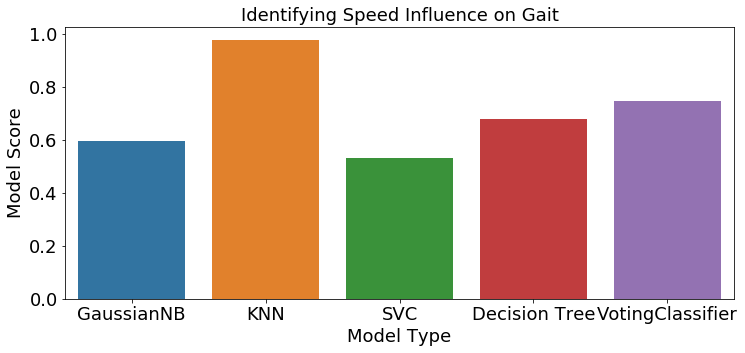

In [24]:

plt.figure(figsize=(12, 5))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
score = [model_Gaussian.score(X_speed_valid, y_speed_valid),model_knn.score(X_speed_valid, y_speed_valid),model_svc.score(X_speed_valid, y_speed_valid),model_tree.score(X_speed_valid, y_speed_valid),model_VotingClass.score(X_speed_valid, y_speed_valid)]
seaborn.barplot(['GaussianNB','KNN','SVC','Decision Tree', 'VotingClassifier'],score)
plt.title('Identifying Speed Influence on Gait')
plt.xlabel('Model Type')
plt.ylabel('Model Score')
plt.show()

In [25]:
#Gender Influence
female_160_walking['class No.'] = 'female_160_walking'
male_180_slow_walking['class No.'] = 'male_180_slow_walking'
female_160_walking['filtered_x'] = low_passed_female_160_walking_x
male_180_slow_walking['filtered_x'] = low_passed_male_180_slow_walking_x
female_160_walking['filtered_y'] = low_passed_female_160_walking_y
male_180_slow_walking['filtered_y'] = low_passed_male_180_slow_walking_y
female_160_walking['filtered_z'] = low_passed_female_160_walking_z
male_180_slow_walking['filtered_z'] = low_passed_male_180_slow_walking_z
frames = [female_160_walking, male_180_slow_walking]
df_ML = pd.concat(frames)
df_ML.head()
X_gender = df_ML[['filtered_x','filtered_y','filtered_z']]
y_gender = df_ML['class No.']
X_gender_train, X_gender_valid, y_gender_train, y_gender_valid = train_test_split(X_gender, y_gender)

female_160_walking['class No.'] = 'female_160_walking'
male_180_slow_walking['class No.'] = 'male_180_slow_walking'
female_160_walking['filtered_x'] = low_passed_female_160_walking_x
male_180_slow_walking['filtered_x'] = low_passed_male_180_slow_walking_x
female_160_walking['filtered_y'] = low_passed_female_160_walking_y
male_180_slow_walking['filtered_y'] = low_passed_male_180_slow_walking_y
female_160_walking['filtered_z'] = low_passed_female_160_walking_z
male_180_slow_walking['filtered_z'] = low_passed_male_180_slow_walking_z
frames = [female_160_walking, male_180_slow_walking]
df_ML = pd.concat(frames)
df_ML.head()
X_gender = df_ML[['filtered_x','filtered_y','filtered_z']]
y_gender = df_ML['class No.']
X_gender_train, X_gender_valid, y_gender_train, y_gender_valid = train_test_split(X_gender, y_gender)

print("female_160_walking vs. male_180_slow_walking")
#GaussianNB
model_Gaussian = GaussianNB()
model_Gaussian.fit(X_gender_train, y_gender_train) 
print("model_Gaussian_train.score is: ", model_Gaussian.score(X_gender_train, y_gender_train))
print("model_Gaussian_valid.score is: ",model_Gaussian.score(X_gender_valid, y_gender_valid))

#KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 6)
model_knn.fit(X_gender_train, y_gender_train)
print("model_knn_train.score is: ", model_knn.score(X_gender_train, y_gender_train))
print("model_knn_valid.score is: ", model_knn.score(X_gender_valid, y_gender_valid))

#SVC
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_gender_train, y_gender_train)
print("model_svc_train.score is: ", model_svc.score(X_gender_train, y_gender_train))
print("model_svc_valid.score is: ", model_svc.score(X_gender_valid, y_gender_valid))

#Regular Decision Tree
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_gender_train, y_gender_train)
print("model_tree_train.score is: ", model_tree.score(X_gender_train, y_gender_train))
print("model_tree_valid.score is: ",model_tree.score(X_gender_valid, y_gender_valid))

#VotingClassifier
model_VotingClass = VotingClassifier([
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(6)),
    ('svm', SVC(kernel='linear', C=1)),
    ('tree1', DecisionTreeClassifier(max_depth=4)),
])
model_VotingClass.fit(X_gender_train, y_gender_train)
print("model_VotingClass_train.score is: ", model_VotingClass.score(X_gender_train, y_gender_train))
print("model_VotingClass_valid.score is: ",model_VotingClass.score(X_gender_valid, y_gender_valid))

female_160_walking vs. male_180_slow_walking
model_Gaussian_train.score is:  0.5670840787119857
model_Gaussian_valid.score is:  0.5736585365853658
model_knn_train.score is:  0.9516994633273703
model_knn_valid.score is:  0.9302439024390244
model_svc_train.score is:  0.5339079525126037
model_svc_valid.score is:  0.5678048780487804
model_tree_train.score is:  0.7023906326231908
model_tree_valid.score is:  0.6834146341463415
model_VotingClass_train.score is:  0.7134493413563181
model_VotingClass_valid.score is:  0.7253658536585366


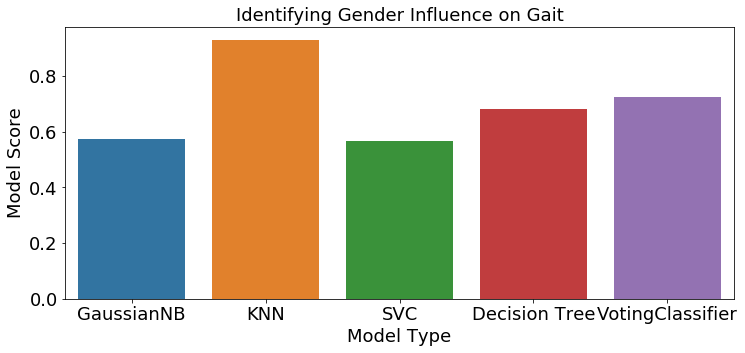

In [26]:

plt.figure(figsize=(12, 5))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
score = [model_Gaussian.score(X_gender_valid, y_gender_valid),model_knn.score(X_gender_valid, y_gender_valid),model_svc.score(X_gender_valid, y_gender_valid),model_tree.score(X_gender_valid, y_gender_valid),model_VotingClass.score(X_gender_valid, y_gender_valid)]
seaborn.barplot(['GaussianNB','KNN','SVC','Decision Tree', 'VotingClassifier'],score)
plt.title('Identifying Gender Influence on Gait')
plt.xlabel('Model Type')
plt.ylabel('Model Score')
plt.show()

In [27]:
#Left foot vs Right foot

male_180_rightfoot_walking['class No.'] = 'male_180_rightfoot_walking'
male_180_fast_walking['class No.'] = 'male_180_fast_walking'
male_180_rightfoot_walking['filtered_x'] = low_passed_male_180_rightfoot_walking_x
male_180_fast_walking['filtered_x'] = low_passed_male_180_fast_walking_x
male_180_rightfoot_walking['filtered_y'] = low_passed_male_180_rightfoot_walking_y
male_180_fast_walking['filtered_y'] = low_passed_male_180_fast_walking_y
male_180_rightfoot_walking['filtered_z'] = low_passed_male_180_rightfoot_walking_z
male_180_fast_walking['filtered_z'] = low_passed_male_180_fast_walking_z
frames = [male_180_rightfoot_walking, male_180_fast_walking]
df_ML = pd.concat(frames)
df_ML.head()
X_Right_Left = df_ML[['filtered_x','filtered_y','filtered_z']]
y_Right_Left = df_ML['class No.']
X_Right_Left_train, X_Right_Left_valid, y_Right_Left_train, y_Right_Left_valid = train_test_split(X_Right_Left, y_Right_Left)

male_180_rightfoot_walking['class No.'] = 'male_180_rightfoot_walking'
male_180_fast_walking['class No.'] = 'male_180_fast_walking'
male_180_rightfoot_walking['filtered_x'] = low_passed_male_180_rightfoot_walking_x
male_180_fast_walking['filtered_x'] = low_passed_male_180_fast_walking_x
male_180_rightfoot_walking['filtered_y'] = low_passed_male_180_rightfoot_walking_y
male_180_fast_walking['filtered_y'] = low_passed_male_180_fast_walking_y
male_180_rightfoot_walking['filtered_z'] = low_passed_male_180_rightfoot_walking_z
male_180_fast_walking['filtered_z'] = low_passed_male_180_fast_walking_z
frames = [male_180_rightfoot_walking, male_180_fast_walking]
df_ML = pd.concat(frames)
df_ML.head()
X_Right_Left = df_ML[['filtered_x','filtered_y','filtered_z']]
y_Right_Left = df_ML['class No.']
X_Right_Left_train, X_Right_Left_valid, y_Right_Left_train, y_Right_Left_valid = train_test_split(X_Right_Left, y_Right_Left)

print("male_180_rightfoot_walking vs. male_180_fast_walking")
#GaussianNB
model_Gaussian = GaussianNB()
model_Gaussian.fit(X_Right_Left_train, y_Right_Left_train) 
print("model_Gaussian_train.score is: ", model_Gaussian.score(X_Right_Left_train, y_Right_Left_train))
print("model_Gaussian.score is: ",model_Gaussian.score(X_Right_Left_valid, y_Right_Left_valid))

#KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 6)
model_knn.fit(X_Right_Left_train, y_Right_Left_train)
print("model_knn_train.score is: ", model_knn.score(X_Right_Left_train, y_Right_Left_train))
print("model_knn_valid.score is: ", model_knn.score(X_Right_Left_valid, y_Right_Left_valid))

#SVC
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_Right_Left_train, y_Right_Left_train)
print("model_svc_train.score is: ", model_svc.score(X_Right_Left_train, y_Right_Left_train))
print("model_svc_valid.score is: ", model_svc.score(X_Right_Left_valid, y_Right_Left_valid))

#Regular Decision Tree
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_Right_Left_train, y_Right_Left_train)
print("model_tree_train.score is: ", model_tree.score(X_Right_Left_train, y_Right_Left_train))
print("model_tree_valid.score is: ",model_tree.score(X_Right_Left_valid, y_Right_Left_valid))

#VotingClassifier
model_VotingClass = VotingClassifier([
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(6)),
    ('svm', SVC(kernel='linear', C=1)),
    ('tree1', DecisionTreeClassifier(max_depth=4)),
])
model_VotingClass.fit(X_Right_Left_train, y_Right_Left_train)
print("model_VotingClass_train.score is: ", model_VotingClass.score(X_Right_Left_train, y_Right_Left_train))
print("model_VotingClass_valid.score is: ",model_VotingClass.score(X_Right_Left_valid, y_Right_Left_valid))


male_180_rightfoot_walking vs. male_180_fast_walking
model_Gaussian_train.score is:  0.6083916083916084
model_Gaussian.score is:  0.6151219512195122
model_knn_train.score is:  0.9873150105708245
model_knn_valid.score is:  0.9814634146341463
model_svc_train.score is:  0.5072369490974142
model_svc_valid.score is:  0.4980487804878049
model_tree_train.score is:  0.7467880956253049
model_tree_valid.score is:  0.7575609756097561
model_VotingClass_train.score is:  0.846316474223451
model_VotingClass_valid.score is:  0.8463414634146341


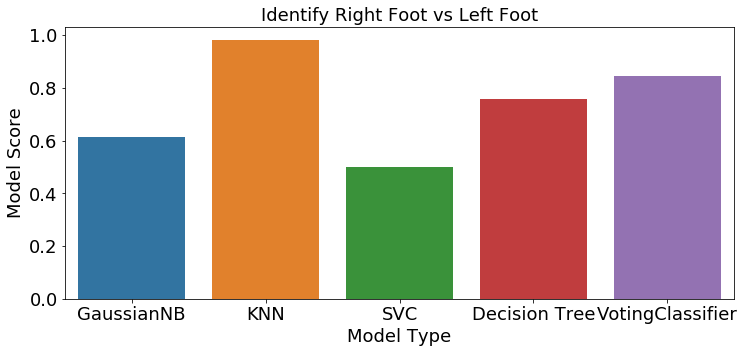

In [28]:

plt.figure(figsize=(12, 5))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
score = [model_Gaussian.score(X_Right_Left_valid, y_Right_Left_valid),model_knn.score(X_Right_Left_valid, y_Right_Left_valid),model_svc.score(X_Right_Left_valid, y_Right_Left_valid),model_tree.score(X_Right_Left_valid, y_Right_Left_valid),model_VotingClass.score(X_Right_Left_valid, y_Right_Left_valid)]
seaborn.barplot(['GaussianNB','KNN','SVC','Decision Tree', 'VotingClassifier'],score)
plt.title('Identify Right Foot vs Left Foot')
plt.xlabel('Model Type')
plt.ylabel('Model Score')
plt.show()

In [29]:
#Running vs Walking
male_180_slow_walking['class No.'] = 'male_180_slow_walking'
male_180_running['class No.'] = 'male_180_running'
male_180_slow_walking['filtered_x'] = low_passed_male_180_slow_walking_x
male_180_running['filtered_x'] = low_passed_male_180_running_x
male_180_slow_walking['filtered_y'] = low_passed_male_180_slow_walking_y
male_180_running['filtered_y'] = low_passed_male_180_running_y
male_180_slow_walking['filtered_z'] = low_passed_male_180_slow_walking_z
male_180_running['filtered_z'] = low_passed_male_180_running_z
frames = [male_180_slow_walking, male_180_running]
df_ML = pd.concat(frames)
df_ML.head()
X_Running_Walking = df_ML[['filtered_x','filtered_y','filtered_z']]
y_Running_Walking = df_ML['class No.']
X_Running_Walking_train, X_Running_Walking_valid, y_Running_Walking_train, y_Running_Walking_valid = train_test_split(X_Running_Walking, y_Running_Walking)

male_180_slow_walking['class No.'] = 'male_180_slow_walking'
male_180_running['class No.'] = 'male_180_running'
male_180_slow_walking['filtered_x'] = low_passed_male_180_slow_walking_x
male_180_running['filtered_x'] = low_passed_male_180_running_x
male_180_slow_walking['filtered_y'] = low_passed_male_180_slow_walking_y
male_180_running['filtered_y'] = low_passed_male_180_running_y
male_180_slow_walking['filtered_z'] = low_passed_male_180_slow_walking_z
male_180_running['filtered_z'] = low_passed_male_180_running_z
frames = [male_180_slow_walking, male_180_running]
df_ML = pd.concat(frames)
df_ML.head()
X_Running_Walking = df_ML[['filtered_x','filtered_y','filtered_z']]
y_Running_Walking = df_ML['class No.']
X_Running_Walking_train, X_Running_Walking_valid, y_Running_Walking_train, y_Running_Walking_valid = train_test_split(X_Running_Walking, y_Running_Walking)

print("male_180_slow_walking vs. male_180_running")
#GaussianNB
model_Gaussian = GaussianNB()
model_Gaussian.fit(X_Running_Walking_train, y_Running_Walking_train) 
print("model_Gaussian_train.score is: ", model_Gaussian.score(X_Running_Walking_train, y_Running_Walking_train))
print("model_Gaussian_valid.score is: ",model_Gaussian.score(X_Running_Walking_valid, y_Running_Walking_valid))

#KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 6)
model_knn.fit(X_Running_Walking_train, y_Running_Walking_train)
print("model_knn_train.score is: ", model_knn.score(X_Running_Walking_train, y_Running_Walking_train))
print("model_knn_valid.score is: ", model_knn.score(X_Running_Walking_valid, y_Running_Walking_valid))

#SVC
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_Running_Walking_train, y_Running_Walking_train)
print("model_svc_train.score is: ", model_svc.score(X_Running_Walking_train, y_Running_Walking_train))
print("model_svc_valid.score is: ", model_svc.score(X_Running_Walking_valid, y_Running_Walking_valid))

#Regular Decision Tree
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_Running_Walking_train, y_Running_Walking_train)
print("model_tree_train.score is: ", model_tree.score(X_Running_Walking_train, y_Running_Walking_train))
print("model_tree_valid.score is: ",model_tree.score(X_Running_Walking_valid, y_Running_Walking_valid))

#VotingClassifier
model_VotingClass = VotingClassifier([
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(6)),
    ('svm', SVC(kernel='linear', C=1)),
    ('tree1', DecisionTreeClassifier(max_depth=4)),
])
model_VotingClass.fit(X_Running_Walking_train, y_Running_Walking_train)
print("model_VotingClass_train.score is: ", model_VotingClass.score(X_Running_Walking_train, y_Running_Walking_train))
print("model_VotingClass_valid.score is: ",model_VotingClass.score(X_Running_Walking_valid, y_Running_Walking_valid))

male_180_slow_walking vs. male_180_running
model_Gaussian_train.score is:  0.730174238723335
model_Gaussian_valid.score is:  0.7220322423058134
model_knn_train.score is:  0.9726428920371275
model_knn_valid.score is:  0.961895456765999
model_svc_train.score is:  0.709819247679531
model_svc_valid.score is:  0.6805080605764533
model_tree_train.score is:  0.7982413287738154
model_tree_valid.score is:  0.777723497801661
model_VotingClass_train.score is:  0.8213645985995767
model_VotingClass_valid.score is:  0.7982413287738154


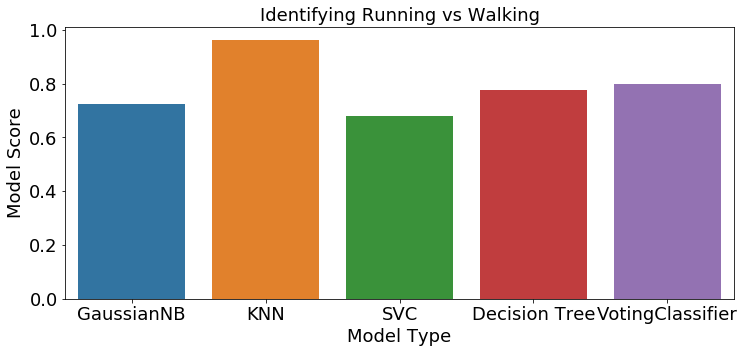

In [30]:

plt.figure(figsize=(12, 5))
plt.rc('font', size=18)          # Set default font size
plt.rc('axes', titlesize=18)     # Set axes title
plt.rc('axes', labelsize=18)    # Set fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # Set fontsize of the tick labels
plt.rc('legend', fontsize=18)    # Set legend fontsize
plt.rc('figure', titlesize=18)  # Set fontsize of the figure title
score = [model_Gaussian.score(X_Running_Walking_valid, y_Running_Walking_valid),model_knn.score(X_Running_Walking_valid, y_Running_Walking_valid),model_svc.score(X_Running_Walking_valid, y_Running_Walking_valid),model_tree.score(X_Running_Walking_valid, y_Running_Walking_valid),model_VotingClass.score(X_Running_Walking_valid, y_Running_Walking_valid)]
seaborn.barplot(['GaussianNB','KNN','SVC','Decision Tree', 'VotingClassifier'],score)
plt.title('Identifying Running vs Walking')
plt.xlabel('Model Type')
plt.ylabel('Model Score')
plt.show()